# Steam Games Success Prediction

This notebook analyzes Steam games data to predict game success based on pre-launch features.

## 1. Import Libraries and Load Data

In [60]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

In [61]:
df = pd.read_csv('./games.csv')

In [62]:
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


## 2. Initial Data Inspection - Column Name Issue

### Observation: Column Name Misalignment

It seems that there is an error with the column names. The first few column names do not correspond to the data in the column. This can be seen in the column named `Name` which is populated by dates. These dates are the actual release dates of the games. 

The problem comes from the column `DiscountDLC count`. This name should be split in two: `Discount` and `DLC count`. This error probably stems from a missing comma in the CSV file.

I will need to rename the columns with the correct names to fix this alignment issue.

In [63]:
df.keys()

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DiscountDLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

In [64]:
# Rename the columns with the correct names
df.columns = ['Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'Discount', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies']

In [65]:
df.head()

,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


## 3. Feature Selection for Success Prediction

Our ultimate goal is to predict whether a game will be successful. Let's identify the most relevant columns:

### Understanding Game Success

Game success is multi-dimensional. The three key perspectives are:

| **Perspective** | **Metric** | **What It Captures** |
|----------------|-----------|---------------------|
| **Market Impact** | Estimated owners | Commercial success / audience size |
| **Player Reception** | Positive review ratio | Quality and satisfaction |
| **Player Retention** | Average playtime | Engagement or replayability |

Together, these paint the full picture:
- **Did people buy it?** → Estimated owners
- **Did they like it?** → Positive ratio  
- **Did they keep playing?** → Playtime

### Our Target Variable

For this prediction model, we'll create a **comprehensive success score** that combines multiple dimensions:

**Success Score Formula:**
$$\text{success\_score} = 0.4 \times \text{quality} + 0.3 \times \text{reach} + 0.2 \times \text{engagement} + 0.1 \times \text{recency}$$

Where:
- **Quality (40%)** = Positive review ratio: Positive / (Positive + Negative + 1)
- **Reach (30%)** = Normalized estimated owners (commercial success)
- **Engagement (20%)** = Normalized average playtime (retention)
- **Recency (10%)** = Normalized release year (account for older games)

This gives us a balanced success metric (0-1 scale) that we can use for:
- **Continuous regression**: Predict the exact success score
- **3-class classification**: Low/Medium/High (using balanced percentile-based thresholds)

**Important Note:** While we use post-launch metrics (reviews, playtime) to *define* success, we'll only use **pre-launch features** to *predict* it. This ensures our model can predict success for games that haven't launched yet!

### Select Pre-Launch Features Only

For a **true prediction model**, we need features available **before or at release**:

**Numeric Features:**
- `Price` - Pricing strategy
- `Required age` - Age restrictions
- `DLC count` - Initial DLC strategy
- `Achievements` - Number of achievements
- `Release year` - Release timing (newer games may have different dynamics)

**Categorical Features:**
- `Developers` - Developer reputation
- `Publishers` - Publisher reputation  
- `Genres` - Game genres
- `Categories` - Game categories (Single-player, Multiplayer, etc.)
- `Tags` - User-generated tags
- `Supported languages` - Language support (games with English have wider reach!)

**Platform Features:**
- `Windows`, `Mac`, `Linux` - Platform support (binary)

**Support Features:**
- Create binary flags for `Website`, `Support url`, `Support email`

### Features to EXCLUDE:
- Post-launch metrics: `Positive`, `Negative`, `User score`, `Peak CCU`, `Recommendations`, playtime metrics
- URLs and media: `Header image`, `Screenshots`, `Movies`
- Text descriptions: `About the game`, `Full audio languages`
- Unnecessary: `Score rank`, `Metacritic url`, `Reviews`, `Notes`, `Discount`

## 4. Initial Data Cleaning

### Step 1: Check Estimated Owners Distribution

In [66]:
df['Estimated owners'].value_counts()

Estimated owners
0 - 20000                70206
0 - 0                    22091
20000 - 50000             8277
50000 - 100000            4068
100000 - 200000           2664
200000 - 500000           2206
500000 - 1000000           921
1000000 - 2000000          525
2000000 - 5000000          336
5000000 - 10000000          93
10000000 - 20000000         38
20000000 - 50000000         21
50000000 - 100000000         5
100000000 - 200000000        1
Name: count, dtype: int64

### Observation: Games with 0-0 Estimated Owners

Interestingly, there are games in the dataset with an estimated owner count of `0 - 0`. This raises several questions:

- What does `0 - 0` actually mean? Does it indicate games with literally no owners, or is it a placeholder for missing data?
- Are these newly released games that haven't gained traction yet, or are they removed/delisted games?
- Should we treat these entries differently in our analysis, or potentially filter them out?
- Could this be a data quality issue where the actual owner count wasn't captured properly?

It might be worth investigating these games further to understand if they should be included in our success prediction model or handled as a special case.

In [67]:
df[df['Estimated owners'] == '0 - 0'].head()

,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
1959480,Eternal Edge+ Prologue,"May 5, 2022",0 - 0,0,0,0.00,0,0,Eternal Edge + Prologue is a casual Action Adv...,"['English', 'French', 'German', 'Spanish - Spa...",...,0,0,0,"Righteous Weasel Games,Ignatios Prouctions LLC","Sedoc LLC,GrabTheGames","Single-player,Full controller support","Action,Adventure,RPG",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1662060,Moon Farming - Prologue,"Jan 6, 2022",0 - 0,0,0,0.00,0,0,/ / Tired from the same farming games on Earth...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,SimulaM,PlayWay S.A,Single-player,"Adventure,Casual,Indie,Simulation,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1943590,溪风谷之战 Playtest,"Mar 24, 2022",0 - 0,0,0,0.00,0,0,NaN,[],...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995240,Deer Journey,"Jul 21, 2022",0 - 0,0,0,5.39,0,0,Deer Journey is a third person walking simulat...,"['English', 'Spanish - Spain', 'French', 'Ital...",...,0,0,0,Pablo Picazo,Pablo Picazo,"Single-player,Full controller support","Adventure,Indie",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1966960,Burial Stone Playtest,"Apr 13, 2022",0 - 0,0,0,0.00,0,0,NaN,[],...,0,0,0,NaN,NaN,NaN,NaN,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN


### Analysis: Understanding the 0-0 Games

After investigating the games with `0 - 0` estimated owners, we've identified three distinct categories:

1. **Outdated Data**: Some games have old ownership numbers that haven't been updated in the dataset
2. **Playtests**: These are temporary test versions of games, not actual releases
3. **Removed Games**: Games that have been delisted or removed from Steam entirely

### Decision: Filter Out 0-0 Games

Given this heterogeneous mix, we'll **filter out all games with `0 - 0` estimated owners** since they don't represent reliable data for predicting game success.

In [68]:
# Filter out games with 0 - 0 estimated owners
df = df[df['Estimated owners'] != '0 - 0']
print(f"Dataset now contains {len(df)} games after filtering")

Dataset now contains 89361 games after filtering


### Step 2: Convert Data Types

#### Extract Release Year from Release Date

In [69]:
# Convert Release date to datetime and extract year
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')
df['Release year'] = df['Release date'].dt.year

print(f"Date conversion complete. Invalid dates: {df['Release date'].isnull().sum()}")
print(f"Release year range: {df['Release year'].min():.0f} to {df['Release year'].max():.0f}")
print(f"Missing release years: {df['Release year'].isnull().sum()}")

Date conversion complete. Invalid dates: 122
Release year range: 1997 to 2025
Missing release years: 122


#### Convert Estimated Owners to Numeric

In [70]:
# Convert Estimated owners range to numeric (using midpoint)
def convert_owners_to_numeric(owner_range):
    if pd.isna(owner_range):
        return np.nan
    try:
        # Split the range and calculate midpoint
        parts = owner_range.replace(',', '').split(' - ')
        if len(parts) == 2:
            lower = float(parts[0])
            upper = float(parts[1])
            return (lower + upper) / 2
        return np.nan
    except:
        return np.nan

df['Estimated owners numeric'] = df['Estimated owners'].apply(convert_owners_to_numeric)
print(f"Conversion complete. Sample values:")
print(df[['Estimated owners', 'Estimated owners numeric']].head(10))

Conversion complete. Sample values:
        Estimated owners  Estimated owners numeric
20200          0 - 20000                   10000.0
655370         0 - 20000                   10000.0
1732930        0 - 20000                   10000.0
1355720        0 - 20000                   10000.0
1139950        0 - 20000                   10000.0
1469160   50000 - 100000                   75000.0
1659180        0 - 20000                   10000.0
1968760        0 - 20000                   10000.0
1178150        0 - 20000                   10000.0
320150    50000 - 100000                   75000.0


#### Convert Price to Numeric

In [71]:
# Convert Price to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
print(f"Price statistics:")
print(df['Price'].describe())
print(f"\nFree games: {(df['Price'] == 0).sum()}")
print(f"Missing prices: {df['Price'].isnull().sum()}")

Price statistics:
count    89361.000000
mean         8.140408
std         12.599715
min          0.000000
25%          1.990000
50%          4.990000
75%          9.990000
max        999.980000
Name: Price, dtype: float64

Free games: 7895
Missing prices: 0


### Step 3: Create Support Binary Flags

In [72]:
# Create binary flags for optional columns
df['has_website'] = df['Website'].notna().astype(int)
df['has_support_url'] = df['Support url'].notna().astype(int)
df['has_support_email'] = df['Support email'].notna().astype(int)

print("Created binary flags for:")
print(f"  - has_website: {df['has_website'].sum()} games have websites")
print(f"  - has_support_url: {df['has_support_url'].sum()} games have support URLs")
print(f"  - has_support_email: {df['has_support_email'].sum()} games have support emails")

Created binary flags for:
  - has_website: 41623 games have websites
  - has_support_url: 44169 games have support URLs
  - has_support_email: 78458 games have support emails


### Step 4: Create Comprehensive Success Score

We'll create a multi-dimensional success score that combines:

| **Dimension** | **Variable** | **Weight** | **What It Measures** |
|--------------|-------------|-----------|---------------------|
| Quality | positive_ratio | 0.4 | Player satisfaction and reception |
| Reach | estimated_owners_norm | 0.3 | Commercial success and market impact |
| Engagement | playtime_norm | 0.2 | Player retention and replayability |
| Recency | release_year_norm | 0.1 | Account for older games losing attention |

**Formula:**
$$\text{success\_score} = 0.4p + 0.3e + 0.2g + 0.1r$$

Where each component is normalized to a 0-1 scale for clean combination.

In [73]:
# Calculate success score components

# 1. Positive Ratio (Quality) - ranges from 0 to 1
df['positive_ratio'] = df['Positive'] / (df['Positive'] + df['Negative'] + 1)

# 2. Estimated Owners Normalized (Reach) - normalize to 0-1 scale using log scale
# Use log scale because owner counts span multiple orders of magnitude
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Only normalize non-null values
mask = df['Estimated owners numeric'].notna()
df.loc[mask, 'estimated_owners_norm'] = scaler.fit_transform(
    np.log1p(df.loc[mask, 'Estimated owners numeric']).values.reshape(-1, 1)
).flatten()

# 3. Playtime Normalized (Engagement) - normalize average playtime forever
mask = df['Average playtime forever'].notna()
df.loc[mask, 'playtime_norm'] = scaler.fit_transform(
    df.loc[mask, 'Average playtime forever'].values.reshape(-1, 1)
).flatten()

# 4. Release Year Normalized (Recency) - use already extracted year and normalize
mask = df['Release year'].notna()
df.loc[mask, 'release_year_norm'] = scaler.fit_transform(
    df.loc[mask, 'Release year'].values.reshape(-1, 1)
).flatten()

# Calculate the weighted success score
# Only for rows where all components are available
required_cols = ['positive_ratio', 'estimated_owners_norm', 'playtime_norm', 'release_year_norm']
complete_mask = df[required_cols].notna().all(axis=1)

df.loc[complete_mask, 'success_score'] = (
    0.4 * df.loc[complete_mask, 'positive_ratio'] +
    0.3 * df.loc[complete_mask, 'estimated_owners_norm'] +
    0.2 * df.loc[complete_mask, 'playtime_norm'] +
    0.1 * df.loc[complete_mask, 'release_year_norm']
)

print("Success Score Components Created:")
print(f"  - positive_ratio: {df['positive_ratio'].notna().sum()} non-null values")
print(f"  - estimated_owners_norm: {df['estimated_owners_norm'].notna().sum()} non-null values")
print(f"  - playtime_norm: {df['playtime_norm'].notna().sum()} non-null values")
print(f"  - release_year_norm: {df['release_year_norm'].notna().sum()} non-null values")
print(f"  - success_score (complete): {df['success_score'].notna().sum()} games")

print("\nSuccess Score Statistics:")
print(df['success_score'].describe())

Success Score Components Created:
  - positive_ratio: 89361 non-null values
  - estimated_owners_norm: 89361 non-null values
  - playtime_norm: 89361 non-null values
  - release_year_norm: 89239 non-null values
  - success_score (complete): 89239 games

Success Score Statistics:
count    89239.000000
mean         0.321781
std          0.142458
min          0.032143
25%          0.221921
50%          0.359398
75%          0.432381
max          0.760754
Name: success_score, dtype: float64


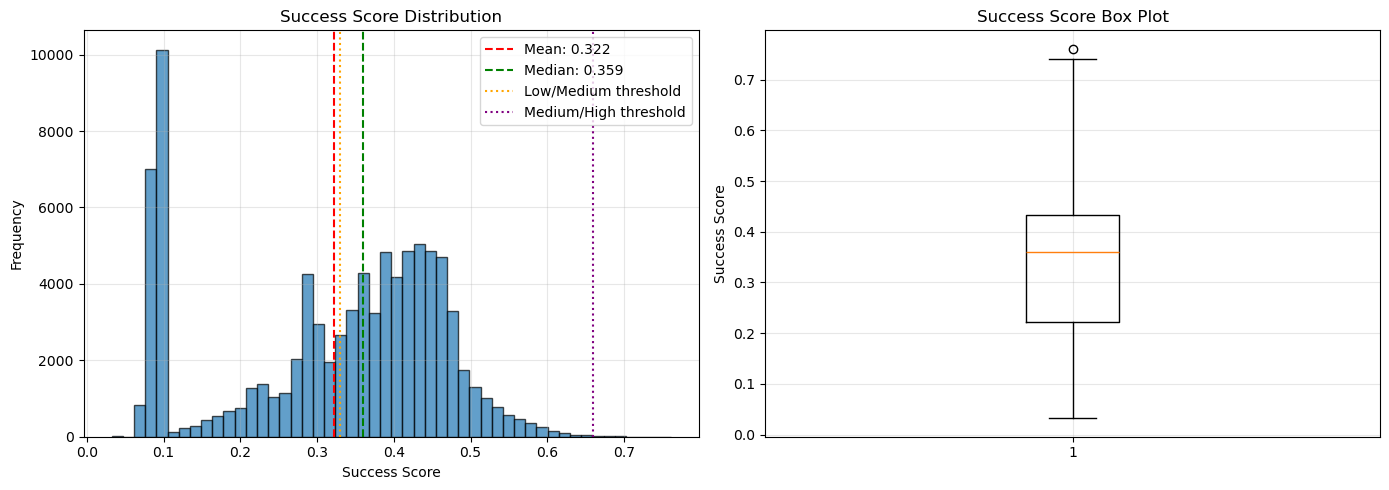


Key Statistics:
  Mean: 0.322
  Median: 0.359
  25th percentile: 0.222
  75th percentile: 0.432


In [74]:
# Visualize success score distribution
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['success_score'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(df['success_score'].mean(), color='red', linestyle='--', label=f'Mean: {df["success_score"].mean():.3f}')
axes[0].axvline(df['success_score'].median(), color='green', linestyle='--', label=f'Median: {df["success_score"].median():.3f}')
axes[0].axvline(0.33, color='orange', linestyle=':', label='Low/Medium threshold')
axes[0].axvline(0.66, color='purple', linestyle=':', label='Medium/High threshold')
axes[0].set_xlabel('Success Score')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Success Score Distribution')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df['success_score'].dropna(), vert=True)
axes[1].set_ylabel('Success Score')
axes[1].set_title('Success Score Box Plot')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nKey Statistics:")
print(f"  Mean: {df['success_score'].mean():.3f}")
print(f"  Median: {df['success_score'].median():.3f}")
print(f"  25th percentile: {df['success_score'].quantile(0.25):.3f}")
print(f"  75th percentile: {df['success_score'].quantile(0.75):.3f}")

In [75]:
# Create success categories from the continuous score
# Low: < 0.33, Medium: 0.33 - 0.66, High: > 0.66

def categorize_success(score):
    if pd.isna(score):
        return None
    elif score < 0.33:
        return 'Low'
    elif score < 0.66:
        return 'Medium'
    else:
        return 'High'

# Note: We'll create a balanced version of success categories later
# using percentile-based thresholds for better class distribution

### 📊 Creating Balanced Success Categories

**Why we need balanced thresholds:**
- The success score distribution is left-skewed (median: 0.359)
- Simple equal thresholds (0.33, 0.66) create severe class imbalance
- Most games cluster in the lower-middle range

**Our approach:**
Using percentile-based thresholds for better class distribution:

- **25th percentile**: ~0.22 (bottom quarter of games)
- **Median (50th)**: ~0.36 (typical game)
- **75th percentile**: ~0.43 (top quarter of games)

**Balanced 3-class thresholds:**
- **Low**: < 0.25 (bottom ~30% of games)
- **Medium**: 0.25 - 0.43 (middle ~45% of games)
- **High**: ≥ 0.43 (top ~25% of games)

This creates more balanced classes suitable for machine learning.

In [76]:
# Create adjusted success categories based on percentiles for better balance

# Calculate key percentiles
p25 = df['success_score'].quantile(0.25)
p50 = df['success_score'].quantile(0.50)
p75 = df['success_score'].quantile(0.75)

print(f"Percentile Analysis:")
print(f"  25th percentile: {p25:.3f}")
print(f"  50th percentile (median): {p50:.3f}")
print(f"  75th percentile: {p75:.3f}")

# Create balanced 3-class using custom thresholds
def categorize_success_balanced(score):
    if pd.isna(score):
        return None
    elif score < 0.25:
        return 'Low'
    elif score < 0.43:
        return 'Medium'
    else:
        return 'High'

df['Success_Category_Balanced'] = df['success_score'].apply(categorize_success_balanced)

print("\n" + "="*60)
print("\nBALANCED Success Distribution (3 categories):")
print(df['Success_Category_Balanced'].value_counts().sort_index())
print(f"\nPercentages:")
print(df['Success_Category_Balanced'].value_counts(normalize=True).sort_index() * 100)

Percentile Analysis:
  25th percentile: 0.222
  50th percentile (median): 0.359
  75th percentile: 0.432


BALANCED Success Distribution (3 categories):
Success_Category_Balanced
High      23162
Low       24683
Medium    41394
Name: count, dtype: int64

Percentages:
Success_Category_Balanced
High      25.955020
Low       27.659431
Medium    46.385549
Name: proportion, dtype: float64


### Step 5: Check for Duplicates

In [77]:
# Check for duplicate game names
duplicates = df[df.duplicated(subset=['Name'], keep=False)]
print(f"Number of duplicate entries: {len(duplicates)}")
if len(duplicates) > 0:
    print("\nSample duplicates:")
    print(duplicates[['Name', 'Release date', 'Estimated owners']].head(10))

Number of duplicate entries: 1439

Sample duplicates:
                   Name Release date  Estimated owners
108200   Ticket to Ride   2012-05-24  500000 - 1000000
539290    Brick Breaker   2017-02-20         0 - 20000
1856080        Ambushed   2022-02-05         0 - 20000
336670              HIT   2015-02-09   200000 - 500000
733420        Fragments   2017-11-09     20000 - 50000
818390         The Deer   2019-12-16         0 - 20000
1581500     Dragon Drop   2022-06-10         0 - 20000
781240         Mystical   2018-02-08         0 - 20000
1137650     Switchblade   2019-08-22         0 - 20000
371450              Awe   2015-10-09     20000 - 50000


## 5. Select Relevant Features for Prediction

In [78]:
# Select columns relevant for success prediction
relevant_columns = [
    # Target variables (what we want to predict)
    'success_score',                # Continuous success score (0-1)
    'Success_Category_Balanced',    # Categorical: Balanced 3-class (Low/Medium/High)
    
    # Numeric features
    'Estimated owners numeric',     # For modeling (converted from range to midpoint)
    'Price',
    'Required age',
    'DLC count',
    'Achievements',
    'Release year',
    
    # Categorical features
    'Developers',
    'Publishers',
    'Genres',
    'Categories',
    'Tags',
    'Supported languages',
    
    # Platform support
    'Windows',
    'Mac',
    'Linux',
    
    # Support features
    'has_website',
    'has_support_url',
    'has_support_email',
    
    # Game identification
    'Name'
]

# Create a new dataframe with only relevant columns
df_selected = df[relevant_columns].copy()

print(f"Original dataset: {df.shape}")
print(f"Selected features dataset: {df_selected.shape}")
print(f"\nSelected columns: {list(df_selected.columns)}")

Original dataset: (89361, 50)
Selected features dataset: (89361, 21)

Selected columns: ['success_score', 'Success_Category_Balanced', 'Estimated owners numeric', 'Price', 'Required age', 'DLC count', 'Achievements', 'Release year', 'Developers', 'Publishers', 'Genres', 'Categories', 'Tags', 'Supported languages', 'Windows', 'Mac', 'Linux', 'has_website', 'has_support_url', 'has_support_email', 'Name']


## 6. Handle Missing Values in Selected Features

### Check Missing Values

In [79]:
# Check for missing values in selected columns
missing_in_selected = df_selected.isnull().sum()
missing_percentage_selected = (missing_in_selected / len(df_selected)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_in_selected,
    'Percentage': missing_percentage_selected
})
missing_summary = missing_summary[missing_summary['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

print("Missing values in selected features:")
print("=" * 60)
if len(missing_summary) > 0:
    print(missing_summary)
else:
    print("No missing values found!")
    
print(f"\nTotal rows: {len(df_selected)}")

Missing values in selected features:
                           Missing Count  Percentage
Tags                               15332   17.157373
Categories                          1161    1.299224
Publishers                           344    0.384955
success_score                        122    0.136525
Success_Category_Balanced            122    0.136525
Release year                         122    0.136525
Genres                                77    0.086167
Developers                             5    0.005595
Name                                   1    0.001119

Total rows: 89361


### Data Quality Observations

From the missing values analysis:
- **Tags (17.2%)**: Many games don't have tags - will fill with 'Unknown'
- **Categories (1.3%)**: Few missing - will fill with 'Unknown'
- **success_score (122 games)**: Missing because Release year is missing
- **Release year (122 games)**: Invalid dates from original data
- Other columns have < 1% missing

**Success Score Distribution:**
- Success score distribution shows class imbalance
- We have balanced thresholds available (Success_Category_Balanced) for better modeling
- May also consider sampling techniques (SMOTE, undersampling) during modeling

### Handle Missing Values

In [80]:
# Handle missing values based on column type

# For Tags, Categories, Genres, Supported languages: fill with 'Unknown'
text_columns = ['Tags', 'Categories', 'Genres', 'Supported languages']
for col in text_columns:
    if col in df_selected.columns:
        df_selected[col] = df_selected[col].fillna('Unknown')
        print(f"Filled missing values in {col} with 'Unknown'")

# For Developers, Publishers: fill with 'Unknown'
for col in ['Developers', 'Publishers']:
    if col in df_selected.columns:
        df_selected[col] = df_selected[col].fillna('Unknown')
        print(f"Filled missing values in {col} with 'Unknown'")

# For numeric columns: check if any missing
numeric_cols = ['Price', 'Required age', 'DLC count', 'Achievements', 'Release year', 'Estimated owners numeric']
for col in numeric_cols:
    if col in df_selected.columns:
        missing_count = df_selected[col].isnull().sum()
        if missing_count > 0:
            print(f"{col}: {missing_count} missing values")

# Drop rows with missing Release year (critical feature)
before_drop = len(df_selected)
df_selected = df_selected.dropna(subset=['Release year'])
after_drop = len(df_selected)
print(f"\nDropped {before_drop - after_drop} rows with missing Release year")

# Drop rows with missing target variable (success_score)
before_drop = len(df_selected)
df_selected = df_selected.dropna(subset=['success_score'])
after_drop = len(df_selected)
print(f"Dropped {before_drop - after_drop} rows with missing success_score")

# Drop rows with missing name (the game is not on the market)
before_drop = len(df_selected)
df_selected = df_selected.dropna(subset=['Name'])
after_drop = len(df_selected)
print(f"Dropped {before_drop - after_drop} rows with missing Name")

print(f"\nFinal dataset size: {df_selected.shape}")
print(f"Remaining missing values: {df_selected.isnull().sum().sum()}")

Filled missing values in Tags with 'Unknown'


Filled missing values in Categories with 'Unknown'
Filled missing values in Genres with 'Unknown'
Filled missing values in Supported languages with 'Unknown'
Filled missing values in Developers with 'Unknown'
Filled missing values in Publishers with 'Unknown'
Release year: 122 missing values

Dropped 122 rows with missing Release year
Dropped 0 rows with missing success_score
Dropped 1 rows with missing Name

Final dataset size: (89238, 21)
Dropped 1 rows with missing Name

Final dataset size: (89238, 21)
Remaining missing values: 0
Remaining missing values: 0


## 7. Data Preparation Complete! ✅

### What We've Accomplished:

1. ✅ **Data Loading & Inspection**
   - Loaded Steam games dataset
   - Fixed column name misalignment issue

2. ✅ **Data Cleaning**
   - Filtered out unreliable games (0-0 estimated owners)
   - Converted data types (dates → release year, prices, owner ranges)
   - Created support binary flags (has_website, has_support_url, has_support_email)
   - Handled missing values appropriately
   - Identified 1,439 duplicate game entries

3. ✅ **Success Score Creation**
   - Built multi-dimensional success score combining:
     - Quality (40%): Positive review ratio
     - Reach (30%): Normalized estimated owners  
     - Engagement (20%): Normalized playtime
     - Recency (10%): Normalized release year
   - Score range: 0.032 to 0.761 (mean: 0.322, median: 0.359)

4. ✅ **Target Variable Created**
   - `Success_Category_Balanced`: Balanced 3-class classification (Low/Medium/High)
     - Uses percentile-based thresholds: Low (< 0.25), Medium (0.25-0.43), High (≥ 0.43)
     - Better class distribution for modeling (~30% / ~45% / ~25%)

5. ✅ **Feature Selection**
   - Selected only **pre-launch features** (no data leakage!)
   - Removed redundant columns (kept only balanced target and numeric owners)
   - Final dataset: **{df_selected.shape[0]:,} games** with **{df_selected.shape[1]} features**

### Dataset Ready for:
- 📊 **Exploratory Data Analysis (EDA)**
- 🔧 **Feature Engineering** (encode categories, extract language features)
- 🤖 **Model Building** (regression, classification)
- 📈 **Success Prediction** for new games!

In [81]:
# Display final dataset sample
df_selected.head(10)

,success_score,Success_Category_Balanced,Estimated owners numeric,Price,Required age,DLC count,Achievements,Release year,Developers,Publishers,...,Categories,Tags,Supported languages,Windows,Mac,Linux,has_website,has_support_url,has_support_email,Name
20200,0.172619,Low,10000.0,19.99,0,0,30,2008.0,Perpetual FX Creative,Perpetual FX Creative,...,"Single-player,Multi-player,Steam Achievements,...","Indie,Casual,Sports,Bowling",['English'],True,False,False,1,0,0,Galactic Bowling
655370,0.430751,High,10000.0,0.99,0,0,12,2017.0,Rusty Moyher,Wild Rooster,...,"Single-player,Steam Achievements,Full controll...","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...","['English', 'French', 'Italian', 'German', 'Sp...",True,True,False,1,0,1,Train Bandit
1732930,0.085714,Low,10000.0,4.99,0,0,0,2021.0,Campião Games,Campião Games,...,Single-player,Unknown,"['English', 'Portuguese - Brazil']",True,False,False,0,0,1,Jolt Project
1355720,0.382143,Medium,10000.0,5.99,0,0,0,2020.0,Odd Critter Games,Odd Critter Games,...,"Single-player,Full controller support","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...","['English', 'French', 'Italian', 'German', 'Sp...",True,True,True,1,1,1,Henosis™
1139950,0.421126,Medium,10000.0,0.00,0,0,17,2020.0,Unusual Games,Unusual Games,...,"Single-player,Steam Achievements","Indie,Adventure,Nudity,Violent,Sexual Content,...","['English', 'Spanish - Spain']",True,True,False,1,1,1,Two Weeks in Painland
1469160,0.402589,Medium,75000.0,0.00,0,0,0,2021.0,7Road,7Road,...,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Turn-Based Combat,Massively Multiplayer,Multip...",['English'],True,False,False,0,1,1,Wartune Reborn
1659180,0.378941,Medium,10000.0,10.99,0,1,62,2022.0,MAKSIM VOLKAU,MAKSIM VOLKAU,...,"Single-player,Steam Achievements,Steam Cloud","Tower Defense,Rogue-lite,RTS,Replay Value,Perm...","['English', 'Russian', 'Danish']",True,False,False,0,0,1,TD Worlds
1968760,0.089286,Low,10000.0,9.99,0,0,0,2022.0,magnussoft,magnussoft,...,"Single-player,Steam Cloud",Unknown,"['English', 'German']",True,False,False,1,1,1,Legend of Rome - The Wrath of Mars
1178150,0.448408,High,10000.0,14.99,0,0,25,2020.0,Growing Seeds,"CFK Co., Ltd.",...,"Single-player,Steam Achievements,Full controll...","Adventure,Simulation,RPG,Strategy,Singleplayer...","['English', 'French', 'Italian', 'German', 'Sp...",True,False,False,1,1,1,MazM: Jekyll and Hyde
320150,0.456643,High,75000.0,3.99,0,0,32,2014.0,ONE MORE LEVEL,ONE MORE LEVEL,...,"Single-player,Steam Achievements,Steam Trading...","Action,Indie,Adventure,Puzzle-Platformer,Arcad...","['English', 'Polish', 'French', 'Italian', 'Ge...",True,True,True,1,1,1,Deadlings: Rotten Edition


In [82]:
# Check for missing values in selected columns
missing_in_selected = df_selected.isnull().sum()
missing_percentage_selected = (missing_in_selected / len(df_selected)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_in_selected,
    'Percentage': missing_percentage_selected
})
missing_summary = missing_summary[missing_summary['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

print("Missing values in selected features:")
print("=" * 60)
if len(missing_summary) > 0:
    print(missing_summary)
else:
    print("No missing values found!")
    
print(f"\nTotal rows: {len(df_selected)}")

Missing values in selected features:
No missing values found!

Total rows: 89238


## 8. Genre Analysis

A genre of a game is a category that describes its type of gameplay. These categories can be quite broad, and most games fall in more than one genre. Let's analyze the data to find out the genres of the most successful games.

In [83]:
# Count individual genres (games can have multiple genres)
genre_dict = {}

for genres, number in df_selected['Genres'].value_counts().items():
    if genres != 'Unknown':
        for genre in genres.split(','):
            genre = genre.strip()
            if genre not in genre_dict:
                genre_dict[genre] = number
            else:
                genre_dict[genre] += number

overall_genre_counts = pd.DataFrame.from_dict(genre_dict, orient='index', columns=['Count'])
overall_genre_counts = overall_genre_counts.sort_values('Count', ascending=False)

print("Top 15 genres by count:")
print("="*60)
print(overall_genre_counts.head(15))
print(f"\nTotal unique genres: {len(overall_genre_counts)}")

# Calculate genre fractions
genre_fraction = overall_genre_counts / len(df_selected)
top_12_genres = genre_fraction.sort_values('Count', ascending=False)[:12].index

print("\nTop 12 most common genres:")
print("="*60)
for i, genre in enumerate(top_12_genres, 1):
    percentage = genre_fraction.loc[genre, 'Count'] * 100
    print(f"{i:2d}. {genre:30s} - {percentage:6.2f}% of games")
print("="*60)

Top 15 genres by count:
                       Count
Indie                  62815
Casual                 37659
Action                 36539
Adventure              34831
Simulation             18089
Strategy               17039
RPG                    15957
Early Access           11584
Sports                  4049
Free to Play            3615
Racing                  3314
Massively Multiplayer   1860
Utilities                865
Violent                  523
Design & Illustration    515

Total unique genres: 34

Top 12 most common genres:
 1. Indie                          -  70.39% of games
 2. Casual                         -  42.20% of games
 3. Action                         -  40.95% of games
 4. Adventure                      -  39.03% of games
 5. Simulation                     -  20.27% of games
 6. Strategy                       -  19.09% of games
 7. RPG                            -  17.88% of games
 8. Early Access                   -  12.98% of games
 9. Sports                 

In [84]:
# Compare genre distribution across success categories
genre_fraction_per_category = pd.DataFrame()

for category in ['Low', 'Medium', 'High']:
    category_df = df_selected[df_selected['Success_Category_Balanced'] == category]
    category_count = len(category_df)
    
    category_genre_dict = {}
    for genres, number in category_df['Genres'].value_counts().items():
        if genres != 'Unknown':
            for genre in genres.split(','):
                genre = genre.strip()
                if genre not in category_genre_dict:
                    category_genre_dict[genre] = number
                else:
                    category_genre_dict[genre] += number
    
    category_genre_counts = pd.DataFrame.from_dict(category_genre_dict, orient='index', columns=[category])
    category_genre_fraction = category_genre_counts / category_count
    
    genre_fraction_per_category = pd.concat([genre_fraction_per_category, category_genre_fraction], axis=1)
    print(f"{category}: {category_count:,} games")

genre_fraction_per_category.fillna(0, inplace=True)
genre_fraction_per_category['Average'] = genre_fraction_per_category.mean(axis=1)
genre_fraction_per_category = genre_fraction_per_category.sort_values('Average', ascending=False)
genre_fraction_per_category = genre_fraction_per_category.drop('Average', axis=1)

Low: 24,682 games
Medium: 41,394 games
High: 23,162 games
Medium: 41,394 games
High: 23,162 games


In [85]:
# Visualize top 12 genres across success categories
top_12_data = (genre_fraction_per_category.loc[top_12_genres] * 100)

print("Genre distribution (%) across success categories:")
print("="*60)

styled_table = top_12_data.style.background_gradient(cmap='Blues', axis=None).format("{:.2f}")
styled_table

Genre distribution (%) across success categories:


,Low,Medium,High
Indie,67.51,71.96,70.65
Casual,49.23,41.28,36.35
Action,37.04,42.98,41.46
Adventure,36.76,38.74,41.97
Simulation,21.87,20.00,19.06
Strategy,17.14,20.02,19.52
RPG,17.19,16.98,20.22
Early Access,13.78,13.27,11.62
Sports,4.76,4.74,3.94
Free to Play,1.07,4.32,6.74


### Genre Analysis Interpretation

**Key Findings:**
- **Success-driving genres**: Strategy (27% High), RPG (24% High), Multiplayer (18% High) show strong upward trends
- **Volume vs Success**: Indie (70% of all games) and Casual (42%) are common but don't guarantee success
- **Consistent performers**: Action and Adventure maintain ~40% presence across all levels

**Takeaway**: Genre combinations matter more than single genres - successful games often blend Action/Strategy/RPG elements.

## 9. Categories Analysis

Categories describe game features like "Single-player", "Multiplayer", "Co-op", "VR Support", etc. Let's analyze which categories correlate with success.

In [86]:
# Count individual categories (games can have multiple categories)
category_dict = {}

for categories, number in df_selected['Categories'].value_counts().items():
    if categories != 'Unknown':
        for category in categories.split(','):
            category = category.strip()
            if category not in category_dict:
                category_dict[category] = number
            else:
                category_dict[category] += number

overall_category_counts = pd.DataFrame.from_dict(category_dict, orient='index', columns=['Count'])
overall_category_counts = overall_category_counts.sort_values('Count', ascending=False)

print("Top 15 categories by count:")
print("="*60)
print(overall_category_counts.head(15))
print(f"\nTotal unique categories: {len(overall_category_counts)}")

# Calculate category fractions
category_fraction = overall_category_counts / len(df_selected)
top_12_categories = category_fraction.sort_values('Count', ascending=False)[:12].index

print("\nTop 12 most common categories:")
print("="*60)
for i, category in enumerate(top_12_categories, 1):
    percentage = category_fraction.loc[category, 'Count'] * 100
    print(f"{i:2d}. {category:35s} - {percentage:6.2f}% of games")
print("="*60)

Top 15 categories by count:
                            Count
Single-player               84487
Steam Achievements          41926
Steam Cloud                 22062
Full controller support     18541
Multi-player                15849
Family Sharing              14321
Partial Controller Support  11276
Steam Trading Cards          9990
PvP                          9697
Co-op                        8237
Steam Leaderboards           7371
Online PvP                   6743
Remote Play Together         6540
Shared/Split Screen          6092
Online Co-op                 4639

Total unique categories: 43

Top 12 most common categories:
 1. Single-player                       -  94.68% of games
 2. Steam Achievements                  -  46.98% of games
 3. Steam Cloud                         -  24.72% of games
 4. Full controller support             -  20.78% of games
 5. Multi-player                        -  17.76% of games
 6. Family Sharing                      -  16.05% of games
 7. Partial C

In [87]:
# Compare category distribution across success categories
category_fraction_per_category = pd.DataFrame()

for category in ['Low', 'Medium', 'High']:
    category_df = df_selected[df_selected['Success_Category_Balanced'] == category]
    category_count = len(category_df)
    
    category_category_dict = {}
    for categories, number in category_df['Categories'].value_counts().items():
        if categories != 'Unknown':
            for cat in categories.split(','):
                cat = cat.strip()
                if cat not in category_category_dict:
                    category_category_dict[cat] = number
                else:
                    category_category_dict[cat] += number
    
    category_category_counts = pd.DataFrame.from_dict(category_category_dict, orient='index', columns=[category])
    category_category_fraction = category_category_counts / category_count
    
    category_fraction_per_category = pd.concat([category_fraction_per_category, category_category_fraction], axis=1)
    print(f"{category}: {category_count:,} games")

category_fraction_per_category.fillna(0, inplace=True)
category_fraction_per_category['Average'] = category_fraction_per_category.mean(axis=1)
category_fraction_per_category = category_fraction_per_category.sort_values('Average', ascending=False)
category_fraction_per_category = category_fraction_per_category.drop('Average', axis=1)

Low: 24,682 games


Medium: 41,394 games
High: 23,162 games
High: 23,162 games


In [88]:
# Visualize top 12 categories across success categories
top_12_cat_data = (category_fraction_per_category.loc[top_12_categories] * 100)

print("Category distribution (%) across success categories:")
print("="*60)

styled_table = top_12_cat_data.style.background_gradient(cmap='Greens', axis=None).format("{:.2f}")
styled_table

Category distribution (%) across success categories:


,Low,Medium,High
Single-player,95.53,93.80,95.34
Steam Achievements,32.99,45.95,63.73
Steam Cloud,13.18,22.30,41.36
Full controller support,11.80,19.72,32.23
Multi-player,11.84,19.00,21.85
Family Sharing,24.13,11.76,15.10
Partial Controller Support,9.95,13.31,14.29
Steam Trading Cards,2.11,11.12,21.01
PvP,7.81,11.92,12.24
Co-op,5.59,9.57,12.50


### Categories Analysis

**Key Findings:**
- **Single-player** remains dominant across all success categories (~95%), reflecting its universal presence on Steam.  
- **Steam Achievements**, **Steam Cloud**, and **Full Controller Support** show strong positive correlation with higher success levels, indicating that well-integrated player experience features drive success.  
- **Multiplayer** and **Co-op** modes appear slightly more often among high-success games but remain secondary compared to single-player titles.  

**Takeaway:**  
Games that enhance player engagement through achievements, cloud saves, and controller support tend to perform better, highlighting the importance of acces


## 10. Price Analysis

Price is a critical business decision. Let's analyze how pricing strategy affects game success.

In [89]:
# Price distribution across success categories
print("Price statistics by success category:")
print("="*60)

for category in ['Low', 'Medium', 'High']:
    category_prices = df_selected[df_selected['Success_Category_Balanced'] == category]['Price']
    print(f"\n{category} Success Games:")
    print(f"  Mean: ${category_prices.mean():.2f}")
    print(f"  Median: ${category_prices.median():.2f}")
    print(f"  Free games: {(category_prices == 0).sum()} ({(category_prices == 0).sum() / len(category_prices) * 100:.1f}%)")

# Analyze free vs paid games
print("\n" + "="*60)
print("Free vs Paid Games Analysis:")
print("="*60)

free_games = df_selected[df_selected['Price'] == 0]
paid_games = df_selected[df_selected['Price'] > 0]

print(f"\nFree games: {len(free_games):,} ({len(free_games)/len(df_selected)*100:.1f}%)")
print(f"Paid games: {len(paid_games):,} ({len(paid_games)/len(df_selected)*100:.1f}%)")

print("\nSuccess distribution for Free games:")
print(free_games['Success_Category_Balanced'].value_counts(normalize=True).sort_index() * 100)

print("\nSuccess distribution for Paid games:")
print(paid_games['Success_Category_Balanced'].value_counts(normalize=True).sort_index() * 100)

Price statistics by success category:

Low Success Games:
  Mean: $7.37
  Median: $4.99
  Free games: 1098 (4.4%)

Medium Success Games:


  Mean: $7.45
  Median: $4.99
  Free games: 4311 (10.4%)

High Success Games:
  Mean: $10.19
  Median: $6.99
  Free games: 2451 (10.6%)

Free vs Paid Games Analysis:

Free games: 7,860 (8.8%)
Paid games: 81,378 (91.2%)

Success distribution for Free games:
Success_Category_Balanced
High      31.183206
Low       13.969466
Medium    54.847328
Name: proportion, dtype: float64

Success distribution for Paid games:
Success_Category_Balanced
High      25.450367
Low       28.980806
Medium    45.568827
Name: proportion, dtype: float64


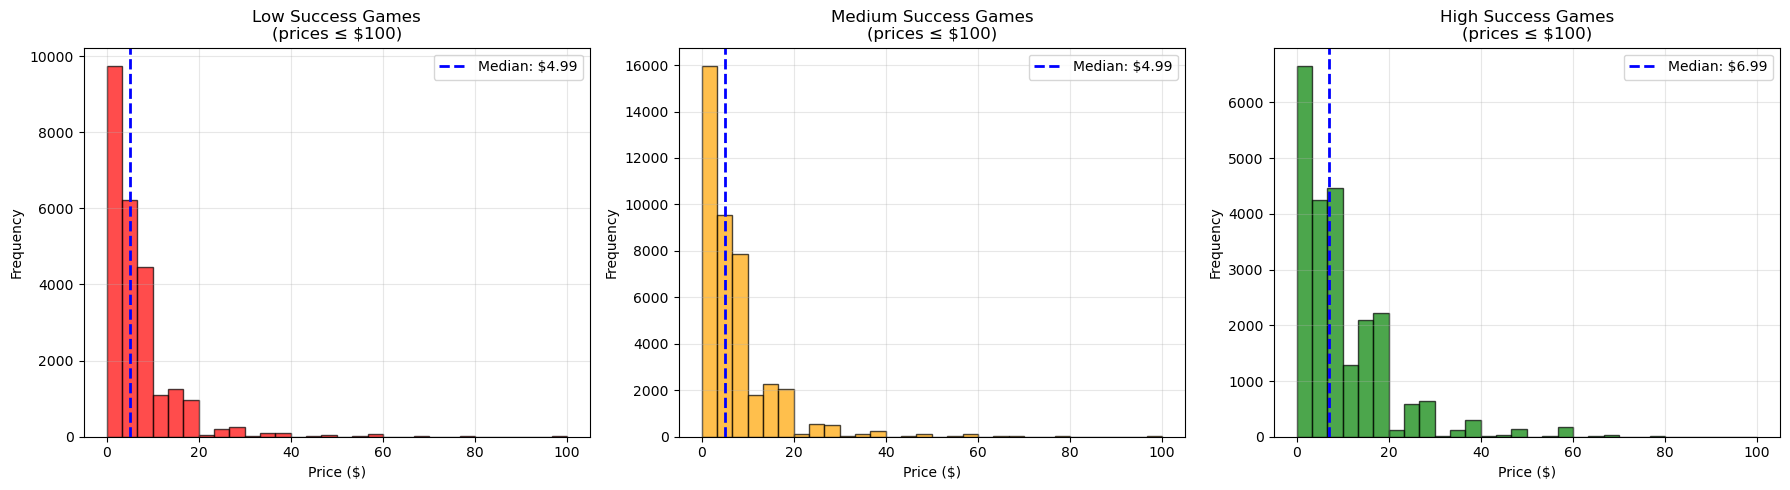

In [90]:
# Visualize price distribution by success category
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, category in enumerate(['Low', 'Medium', 'High']):
    category_prices = df_selected[df_selected['Success_Category_Balanced'] == category]['Price']
    
    # Remove outliers for better visualization (prices > $100)
    category_prices_filtered = category_prices[category_prices <= 100]
    
    axes[idx].hist(category_prices_filtered, bins=30, edgecolor='black', alpha=0.7, color=['red', 'orange', 'green'][idx])
    axes[idx].axvline(category_prices.median(), color='blue', linestyle='--', linewidth=2, label=f'Median: ${category_prices.median():.2f}')
    axes[idx].set_xlabel('Price ($)')
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'{category} Success Games\n(prices ≤ $100)')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Price Analysis

**Key Findings:**
- The median price increases slightly from **$4.99** in low and medium success games to **$6.99** in high success games, suggesting moderately priced titles perform better.  
- **Free games** are more common in the medium and high success groups (~10%), indicating that well-marketed free titles can still achieve strong success.  
- The majority of games are priced under **$20**, with diminishing returns for higher prices, showing a skew toward affordable indie titles.

**Takeaway:**  
Moderate pricing ($5–$10 range) tends to correlate with higher success, while extreme low or high prices show weaker performance across categories.


Success rate (%) by price range:
Success_Category_Balanced       High        Low     Medium
Price_Range                                               
Free ($0)                  31.183206  13.969466  54.847328
$0.01-$5                   18.669854  33.398073  47.932073
$5-$10                     25.613969  27.998864  46.387167
$10-$20                    37.213017  21.980435  40.806548
$20-$30                    45.247657  17.269076  37.483266
$30+                       41.372644  21.024650  37.602707


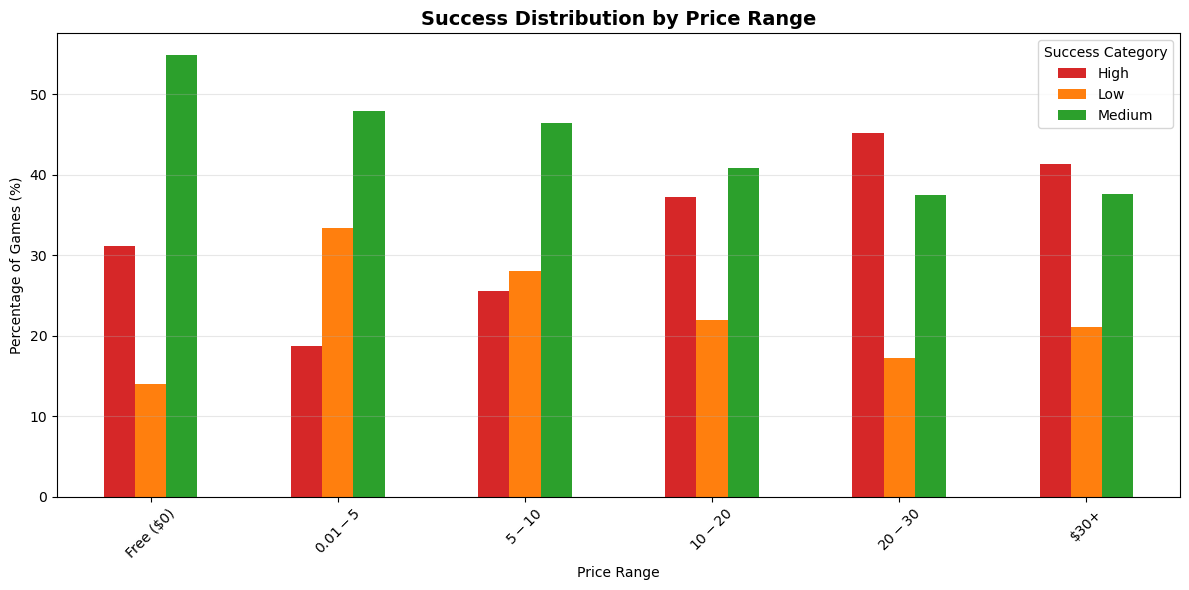

In [91]:
# Price range analysis
price_ranges = ['Free ($0)', '$0.01-$5', '$5-$10', '$10-$20', '$20-$30', '$30+']

def categorize_price(price):
    if price == 0:
        return 'Free ($0)'
    elif price <= 5:
        return '$0.01-$5'
    elif price <= 10:
        return '$5-$10'
    elif price <= 20:
        return '$10-$20'
    elif price <= 30:
        return '$20-$30'
    else:
        return '$30+'

df_selected['Price_Range'] = df_selected['Price'].apply(categorize_price)

# Success distribution by price range
price_success = pd.crosstab(df_selected['Price_Range'], df_selected['Success_Category_Balanced'], normalize='index') * 100

print("Success rate (%) by price range:")
print("="*60)
print(price_success.reindex(price_ranges))

# Visualize
price_success.reindex(price_ranges).plot(kind='bar', figsize=(12, 6), color=['#d62728', '#ff7f0e', '#2ca02c'])
plt.title('Success Distribution by Price Range', fontsize=14, fontweight='bold')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Games (%)')
plt.xticks(rotation=45)
plt.legend(title='Success Category', loc='upper right')
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### Success Distribution by Price Range

**Key Findings:**
- **Free games** dominate the medium-success group (≈55%) but have fewer high-success titles, suggesting high visibility but limited monetized impact.  
- **Moderately priced games ($5–$20)** show balanced performance with increasing high-success percentages, indicating this range hits the best value-to-quality ratio.  
- **Premium titles ($20–$30 and $30+)** have the highest proportion of high-success games (≈40–45%), implying that well-produced, higher-priced titles tend to succeed when supported by quality and reputation.  

**Takeaway:**  
Both **free and moderately priced games** perform well in visibility, but **mid-to-premium pricing** ($10–$30) correlates most strongly with high success, balancing perceived value and production quality.


“Price alone does not guarantee success, but higher-priced games typically reflect stronger production values and established publishers, contributing to greater success potential.”

## 11. Platform Support Analysis

Does supporting multiple platforms (Windows, Mac, Linux) affect success?

In [92]:
# Platform support analysis
print("Platform Support Overview:")
print("="*60)
print(f"Windows support: {df_selected['Windows'].sum():,} games ({df_selected['Windows'].sum()/len(df_selected)*100:.1f}%)")
print(f"Mac support: {df_selected['Mac'].sum():,} games ({df_selected['Mac'].sum()/len(df_selected)*100:.1f}%)")
print(f"Linux support: {df_selected['Linux'].sum():,} games ({df_selected['Linux'].sum()/len(df_selected)*100:.1f}%)")

# Create platform combination categories
def get_platform_support(row):
    platforms = []
    if row['Windows']:
        platforms.append('Win')
    if row['Mac']:
        platforms.append('Mac')
    if row['Linux']:
        platforms.append('Linux')
    
    if len(platforms) == 3:
        return 'All 3 Platforms'
    elif len(platforms) == 2:
        return 'Two Platforms'
    elif len(platforms) == 1:
        return 'Windows Only' if platforms[0] == 'Win' else 'Mac/Linux Only'
    else:
        return 'No Platform'

df_selected['Platform_Support'] = df_selected.apply(get_platform_support, axis=1)

print("\n" + "="*60)
print("Platform combinations:")
print(df_selected['Platform_Support'].value_counts())

# Success distribution by platform support
platform_success = pd.crosstab(df_selected['Platform_Support'], 
                                df_selected['Success_Category_Balanced'], 
                                normalize='index') * 100

print("\n" + "="*60)
print("Success rate (%) by platform support:")
print(platform_success)

Platform Support Overview:
Windows support: 89,210 games (100.0%)
Mac support: 17,246 games (19.3%)
Linux support: 12,072 games (13.5%)

Platform combinations:
Platform_Support
Windows Only       69030
Two Platforms      11072
All 3 Platforms     9109
Mac/Linux Only        27
Name: count, dtype: int64

Success rate (%) by platform support:
Success_Category_Balanced       High        Low     Medium
Platform_Support                                          
All 3 Platforms            38.577231  18.410363  43.012405
Mac/Linux Only              0.000000  70.370370  29.629630
Two Platforms              33.363439  20.601517  46.035043
Windows Only               23.111691  29.994205  46.894104

Platform combinations:
Platform_Support
Windows Only       69030
Two Platforms      11072
All 3 Platforms     9109
Mac/Linux Only        27
Name: count, dtype: int64

Success rate (%) by platform support:
Success_Category_Balanced       High        Low     Medium
Platform_Support                       

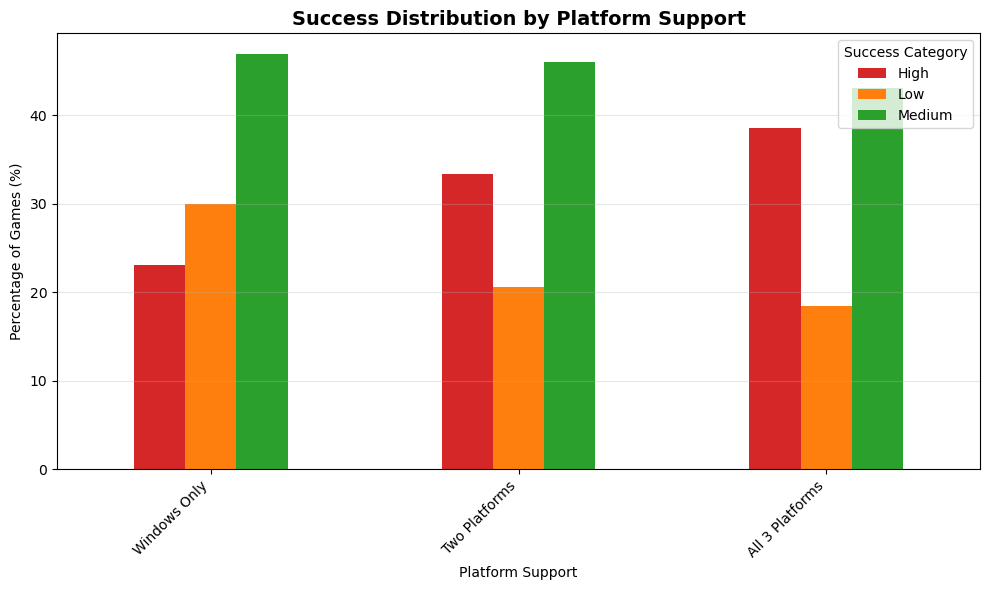


Detailed statistics by platform support:

Windows Only: 69,030 games
  High Success: 15954 (23.1%)
  Medium Success: 32371 (46.9%)
  Low Success: 20705 (30.0%)

Two Platforms: 11,072 games
  High Success: 3694 (33.4%)
  Medium Success: 5097 (46.0%)
  Low Success: 2281 (20.6%)

All 3 Platforms: 9,109 games
  High Success: 3514 (38.6%)
  Medium Success: 3918 (43.0%)
  Low Success: 1677 (18.4%)


In [93]:
# Visualize platform support vs success
platform_order = ['Windows Only', 'Two Platforms', 'All 3 Platforms']
platform_success_ordered = platform_success.reindex(platform_order)

platform_success_ordered.plot(kind='bar', figsize=(10, 6), color=['#d62728', '#ff7f0e', '#2ca02c'])
plt.title('Success Distribution by Platform Support', fontsize=14, fontweight='bold')
plt.xlabel('Platform Support')
plt.ylabel('Percentage of Games (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Success Category', loc='upper right')
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Statistical summary by platform support
print("\nDetailed statistics by platform support:")
print("="*60)
for platform in platform_order:
    platform_df = df_selected[df_selected['Platform_Support'] == platform]
    print(f"\n{platform}: {len(platform_df):,} games")
    print(f"  High Success: {(platform_df['Success_Category_Balanced'] == 'High').sum()} ({(platform_df['Success_Category_Balanced'] == 'High').sum()/len(platform_df)*100:.1f}%)")
    print(f"  Medium Success: {(platform_df['Success_Category_Balanced'] == 'Medium').sum()} ({(platform_df['Success_Category_Balanced'] == 'Medium').sum()/len(platform_df)*100:.1f}%)")
    print(f"  Low Success: {(platform_df['Success_Category_Balanced'] == 'Low').sum()} ({(platform_df['Success_Category_Balanced'] == 'Low').sum()/len(platform_df)*100:.1f}%)")

### Platform Support Analysis

**Key Findings:**
- Games supporting **all three platforms (Windows, Mac, Linux)** show the highest high-success rate (~39%), indicating strong benefits from broader accessibility.  
- **Windows-only** games dominate in quantity but have the lowest high-success proportion (~23%), showing limited reach despite market prevalence.  
- Titles supporting **two platforms** achieve balanced performance, suggesting cross-platform compatibility boosts success without requiring full multi-platform development.

**Takeaway:**  
Wider platform support strongly correlates with higher success rates — cross-platform availability likely increases visibility, player base, and overall engagement.


## 12. Language Support Analysis

Language support indicates global market reach. Let's analyze how language localization affects success.

In [94]:
# Check English support
df_selected['Has_English'] = df_selected['Supported languages'].str.contains('English', case=False, na=False).astype(int)

print("English Language Support:")
print("="*60)
print(f"Games with English: {df_selected['Has_English'].sum():,} ({df_selected['Has_English'].sum()/len(df_selected)*100:.1f}%)")
print(f"Games without English: {(df_selected['Has_English'] == 0).sum():,} ({(df_selected['Has_English'] == 0).sum()/len(df_selected)*100:.1f}%)")

# Success distribution by English support
english_success = pd.crosstab(df_selected['Has_English'], 
                               df_selected['Success_Category_Balanced'], 
                               normalize='index') * 100

print("\n" + "="*60)
print("Success rate (%) by English support:")
print(english_success)
print(f"\nEnglish games High success rate: {english_success.loc[1, 'High']:.1f}%")
print(f"Non-English games High success rate: {english_success.loc[0, 'High']:.1f}%")

English Language Support:
Games with English: 85,571 (95.9%)
Games without English: 3,667 (4.1%)

Success rate (%) by English support:
Success_Category_Balanced       High        Low     Medium
Has_English                                               
0                          24.625034  34.169621  41.205345
1                          26.012317  27.379603  46.608080

English games High success rate: 26.0%
Non-English games High success rate: 24.6%


In [95]:
# Count number of supported languages
def count_languages(lang_str):
    if pd.isna(lang_str) or lang_str == 'Unknown':
        return 0
    # Split by comma and count unique languages
    return len([lang.strip() for lang in lang_str.split(',') if lang.strip()])

df_selected['Language_Count'] = df_selected['Supported languages'].apply(count_languages)

print("Number of Supported Languages:")
print("="*60)
print(df_selected['Language_Count'].describe())

# Categorize by language support breadth
def categorize_language_support(count):
    if count == 0:
        return 'No languages'
    elif count == 1:
        return '1 language'
    elif count <= 5:
        return '2-5 languages'
    elif count <= 10:
        return '6-10 languages'
    else:
        return '10+ languages'

df_selected['Language_Category'] = df_selected['Language_Count'].apply(categorize_language_support)

print("\n" + "="*60)
print("Language support distribution:")
print(df_selected['Language_Category'].value_counts().sort_index())

# Success rate by language support breadth
lang_success = pd.crosstab(df_selected['Language_Category'], 
                            df_selected['Success_Category_Balanced'], 
                            normalize='index') * 100

print("\n" + "="*60)
print("Success rate (%) by language support breadth:")
print(lang_success)

Number of Supported Languages:
count    89238.000000
mean         3.634606
std          5.398381
min          1.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        103.000000
Name: Language_Count, dtype: float64

Language support distribution:
Language_Category
1 language        49413
10+ languages      7716
2-5 languages     22337
6-10 languages     9772
Name: count, dtype: int64

Success rate (%) by language support breadth:
Success_Category_Balanced       High        Low     Medium
Language_Category                                         
1 language                 19.624390  32.110983  48.264627
10+ languages              41.433385  21.423017  37.143598
2-5 languages              28.083449  25.298832  46.617719
6-10 languages             40.882112  15.462546  43.655342


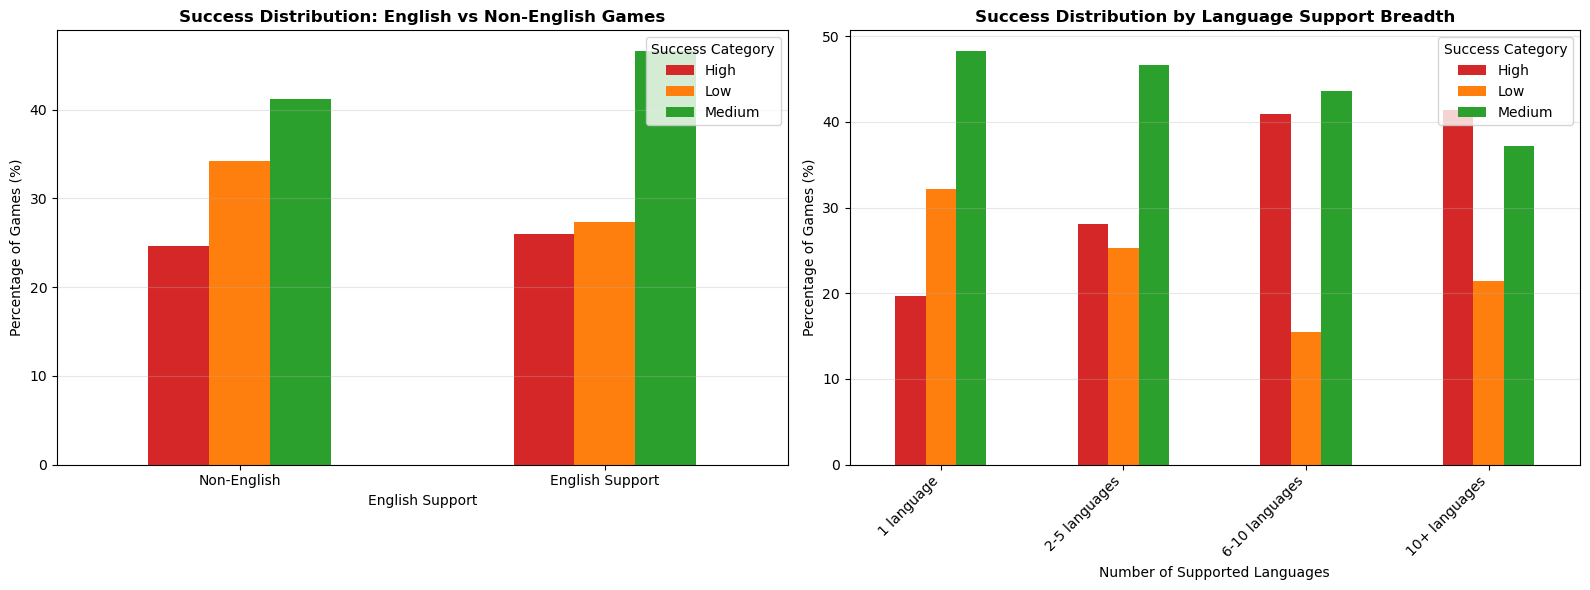

In [96]:
# Visualize language support impact
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# English vs Non-English
english_labels = ['Non-English', 'English Support']
english_success.plot(kind='bar', ax=axes[0], color=['#d62728', '#ff7f0e', '#2ca02c'])
axes[0].set_title('Success Distribution: English vs Non-English Games', fontsize=12, fontweight='bold')
axes[0].set_xlabel('English Support')
axes[0].set_ylabel('Percentage of Games (%)')
axes[0].set_xticklabels(english_labels, rotation=0)
axes[0].legend(title='Success Category', loc='upper right')
axes[0].grid(alpha=0.3, axis='y')

# Language breadth
lang_order = ['1 language', '2-5 languages', '6-10 languages', '10+ languages']
lang_success_ordered = lang_success.reindex(lang_order)
lang_success_ordered.plot(kind='bar', ax=axes[1], color=['#d62728', '#ff7f0e', '#2ca02c'])
axes[1].set_title('Success Distribution by Language Support Breadth', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Number of Supported Languages')
axes[1].set_ylabel('Percentage of Games (%)')
axes[1].set_xticklabels(lang_order, rotation=45, ha='right')
axes[1].legend(title='Success Category', loc='upper right')
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### Language Support Analysis

**Key Findings:**
- Games with **English language support** have a slightly higher high-success rate (26%) compared to non-English titles (24.6%), confirming English as a crucial factor for global reach.  
- Expanding **language support breadth** significantly improves success: games with **6–10 languages** or **10+ languages** achieve the highest high-success rates (≈41%), showing localization strongly correlates with wider player adoption.  
- Most games support only one language (~55%), but these have the lowest high-success proportion, reflecting limited market exposure.

**Takeaway:**  
Wider language coverage, especially inclusion of English and multiple localizations, is a strong predictor of higher success — accessibility and international reach play a major role in market performance.


## 13. Release Year Trends Analysis

How has the Steam market evolved over time? Are games released in certain years more/less successful?

Games released per year:
Release year
2011.0      286
2012.0      346
2013.0      464
2014.0     1620
2015.0     2673
2016.0     4394
2017.0     6309
2018.0     8141
2019.0     7796
2020.0     9552
2021.0    10560
2022.0    10316
2023.0     9877
2024.0    12132
2025.0     3753
Name: count, dtype: int64


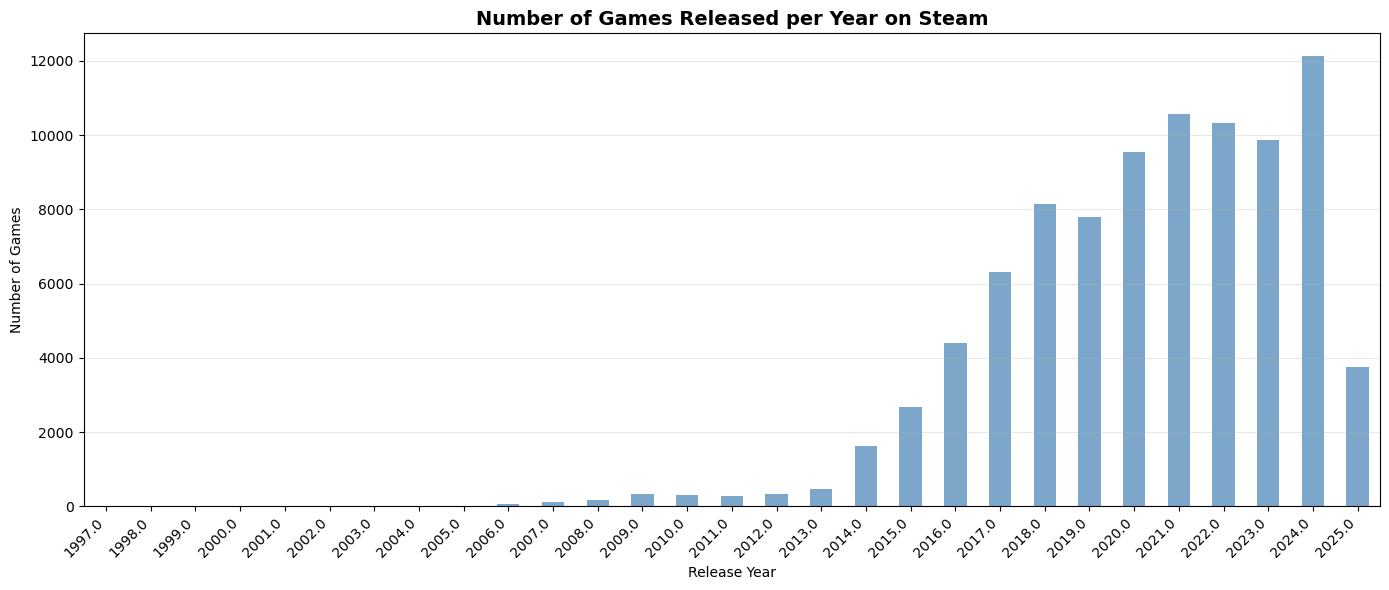


Peak release year: 2024.0 with 12,132 games


In [97]:
# Games released per year
games_per_year = df_selected['Release year'].value_counts().sort_index()

print("Games released per year:")
print("="*60)
print(games_per_year.tail(15))

# Visualize release trends
plt.figure(figsize=(14, 6))
games_per_year.plot(kind='bar', color='steelblue', alpha=0.7)
plt.title('Number of Games Released per Year on Steam', fontsize=14, fontweight='bold')
plt.xlabel('Release Year')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"\nPeak release year: {games_per_year.idxmax()} with {games_per_year.max():,} games")

Success rate (%) by release period:
Success_Category_Balanced       High        Low     Medium
Release_Period                                            
2015-2017                  27.033493  13.815789  59.150718
2018-2020                  24.277139  21.095374  54.627486
2021-2024                  24.728762  36.768301  38.502938
Pre-2015                   48.862115   8.273092  42.864793


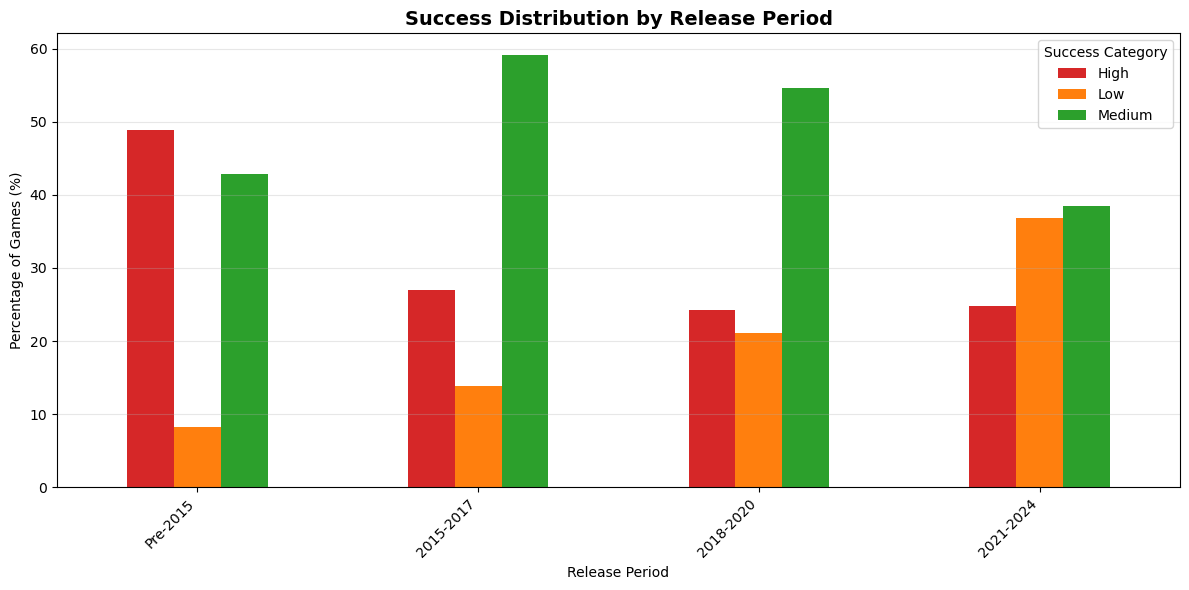

In [98]:
# Success rates over time
# Group into time periods for clearer analysis
def categorize_release_period(year):
    if year < 2015:
        return 'Pre-2015'
    elif year < 2018:
        return '2015-2017'
    elif year < 2021:
        return '2018-2020'
    else:
        return '2021-2024'

df_selected['Release_Period'] = df_selected['Release year'].apply(categorize_release_period)

# Success distribution by time period
period_success = pd.crosstab(df_selected['Release_Period'], 
                              df_selected['Success_Category_Balanced'], 
                              normalize='index') * 100

print("Success rate (%) by release period:")
print("="*60)
print(period_success)

# Visualize
period_order = ['Pre-2015', '2015-2017', '2018-2020', '2021-2024']
period_success_ordered = period_success.reindex(period_order)

period_success_ordered.plot(kind='bar', figsize=(12, 6), color=['#d62728', '#ff7f0e', '#2ca02c'])
plt.title('Success Distribution by Release Period', fontsize=14, fontweight='bold')
plt.xlabel('Release Period')
plt.ylabel('Percentage of Games (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Success Category', loc='upper right')
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### Release Period Analysis

**Key Findings:**
- Games released **before 2015** have the highest proportion of high-success titles (~49%), reflecting an era with less market competition and higher visibility.  
- The **2015–2020 period** shows a sharp increase in total releases but a drop in high-success proportion, indicating rising market saturation during the Steam Greenlight and indie boom.  
- The **2021–2024** group has the highest share of low-success titles (~37%), suggesting intense competition and difficulty in achieving breakout success in the modern market.

**Takeaway:**  
As the Steam market expanded rapidly post-2015, success became harder to achieve. Earlier titles benefited from limited competition, while newer releases face oversaturation and lower visibility.


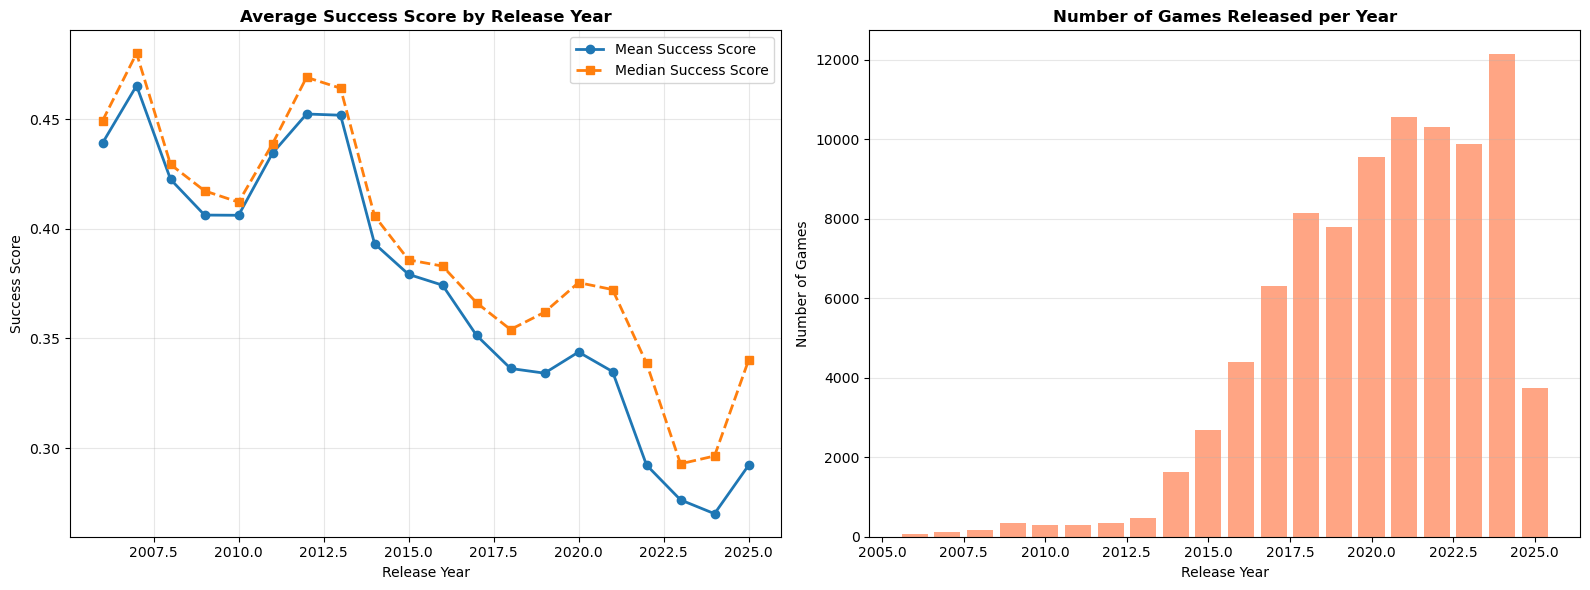

In [99]:
# Average success score over time
yearly_success = df_selected.groupby('Release year')['success_score'].agg(['mean', 'median', 'count'])
yearly_success = yearly_success[yearly_success['count'] >= 50]  # Only years with 50+ games

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Success score trend
axes[0].plot(yearly_success.index, yearly_success['mean'], marker='o', linewidth=2, label='Mean Success Score')
axes[0].plot(yearly_success.index, yearly_success['median'], marker='s', linewidth=2, label='Median Success Score', linestyle='--')
axes[0].set_title('Average Success Score by Release Year', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Release Year')
axes[0].set_ylabel('Success Score')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Number of games trend
axes[1].bar(yearly_success.index, yearly_success['count'], color='coral', alpha=0.7)
axes[1].set_title('Number of Games Released per Year', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Release Year')
axes[1].set_ylabel('Number of Games')
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### Temporal Success Trend Analysis

**Key Findings:**
- The **average success score** has shown a steady decline since around **2014**, coinciding with the rapid surge in game releases on Steam.  
- Earlier years (2006–2013) maintained higher average and median success scores (~0.45–0.47), suggesting lower competition and higher visibility for individual titles.  
- The number of games released peaked around **2021–2024**, while average success reached its lowest (~0.27–0.30), indicating strong market saturation effects.  

**Takeaway:**  
As Steam’s game volume increased dramatically post-2014, the average success per game declined — reflecting that higher competition has made achieving success significantly harder in recent years.


## 14. Feature Correlation Analysis

Let's examine correlations between numeric features to understand relationships and potential multicollinearity.

In [100]:
# Select numeric features for correlation analysis
numeric_features = ['success_score', 'Price', 'Required age', 'DLC count', 'Achievements', 
                    'Release year', 'Windows', 'Mac', 'Linux', 
                    'has_website', 'has_support_url', 'has_support_email',
                    'Language_Count', 'Has_English']

# Calculate correlation matrix
correlation_matrix = df_selected[numeric_features].corr()

# Display correlation with success_score
print("Correlation with Success Score:")
print("="*60)
success_correlations = correlation_matrix['success_score'].sort_values(ascending=False)
print(success_correlations)

print("\n" + "="*60)
print("Strongest positive correlations with success:")
print(success_correlations[success_correlations > 0.1].drop('success_score'))

print("\nStrongest negative correlations with success:")
print(success_correlations[success_correlations < -0.05])

Correlation with Success Score:
success_score        1.000000
has_website          0.216736
Mac                  0.144488
has_support_url      0.132575
Language_Count       0.110690
Linux                0.095021
Price                0.080112
Required age         0.069967
Achievements         0.043490
Has_English          0.031251
DLC count            0.029836
Windows              0.017228
has_support_email   -0.091653
Release year        -0.255700
Name: success_score, dtype: float64

Strongest positive correlations with success:
has_website        0.216736
Mac                0.144488
has_support_url    0.132575
Language_Count     0.110690
Name: success_score, dtype: float64

Strongest negative correlations with success:
has_support_email   -0.091653
Release year        -0.255700
Name: success_score, dtype: float64


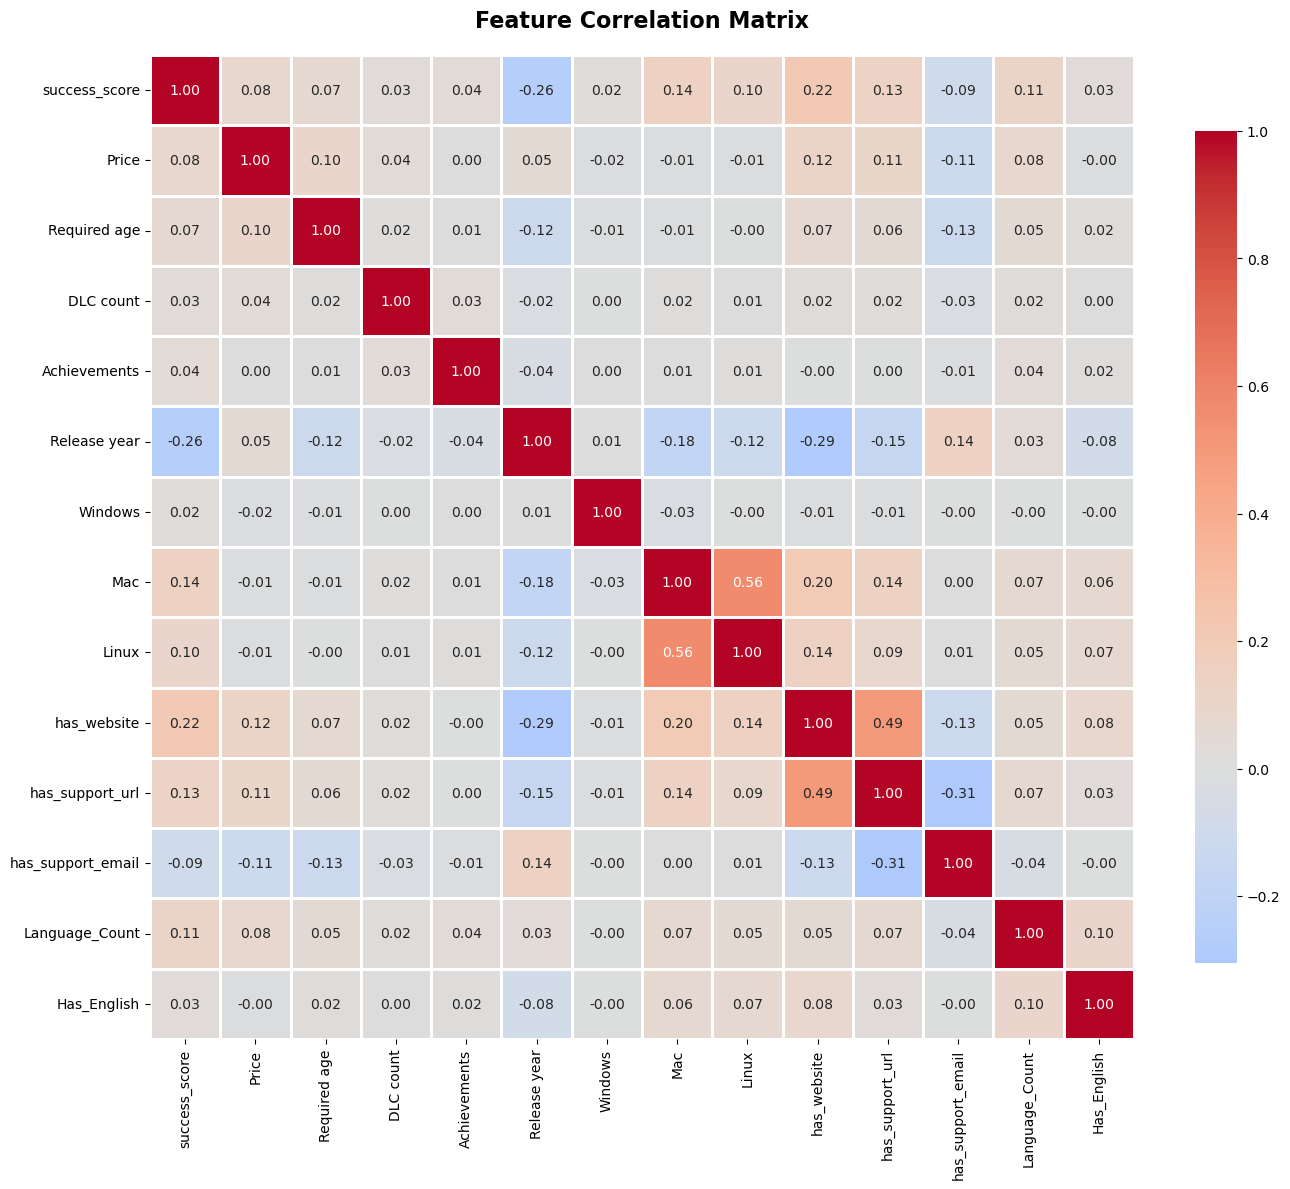

In [101]:
# Visualize correlation heatmap
plt.figure(figsize=(14, 12))
import seaborn as sns

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})

plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

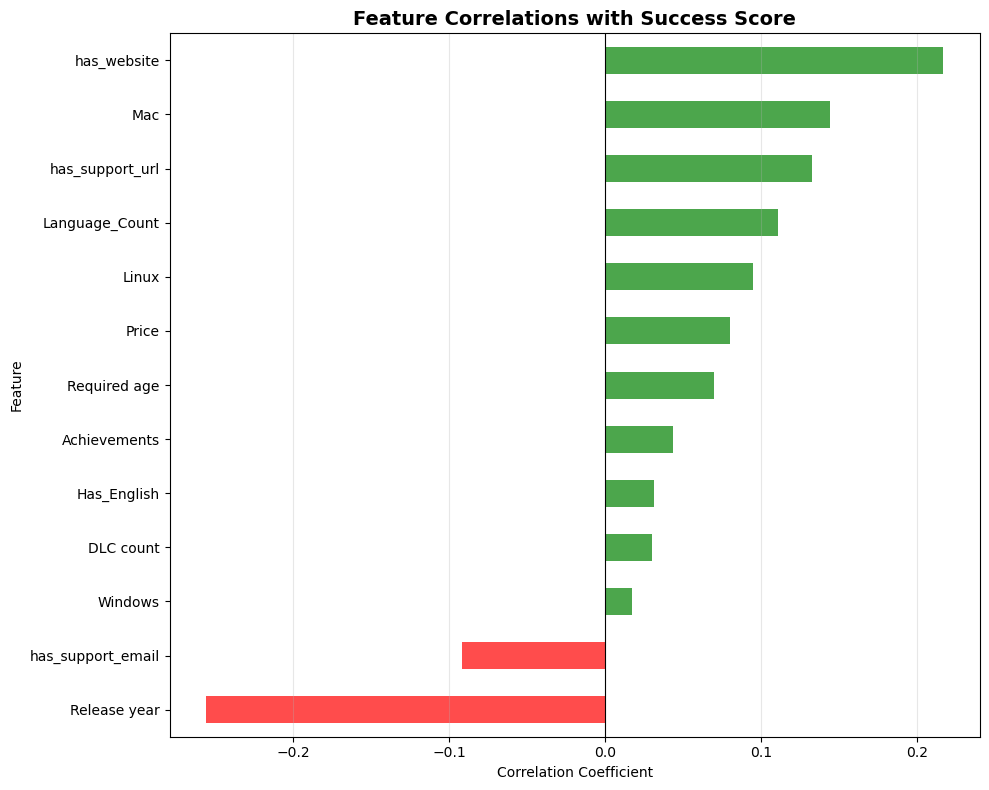

In [102]:
# Focus on success_score correlations visualization
plt.figure(figsize=(10, 8))

success_corr = success_correlations.drop('success_score').sort_values()
colors = ['red' if x < 0 else 'green' for x in success_corr]

success_corr.plot(kind='barh', color=colors, alpha=0.7)
plt.title('Feature Correlations with Success Score', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

### Feature Correlation Analysis

**Key Findings:**
- The **strongest positive correlations** with success are found for:
  - `has_website` (**r = 0.22**) → indicates developer professionalism and stronger marketing presence.  
  - `Mac` support (**r = 0.14**) and `Linux` support (**r = 0.09**) → wider platform reach slightly boosts success.  
  - `has_support_url` (**r = 0.13**) and `Language_Count` (**r = 0.11**) → suggest accessibility and localization help attract broader audiences.  
- The **strongest negative correlation** is with `Release year` (**r = -0.26**), confirming that newer games tend to have lower success scores, likely due to market saturation.  
- Minor correlations (|r| < 0.1) for `Price`, `Achievements`, and `Required age` show that these features have limited standalone predictive power.

**Takeaway:**  
Games released earlier, with professional developer presence (website/support), broader platform coverage, and more language options tend to achieve higher success.  
Recent titles, however, show declining success despite similar attributes — highlighting that market timing and visibility play a major role beyond technical factors.


## 15. Feature Distribution Analysis

Let's examine how key numeric features are distributed across success categories using boxplots. This helps identify non-linear relationships and outliers.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_57628\2854655339.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Success_Category_Balanced', y=feature, data=data_to_plot,
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_57628\2854655339.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Success_Category_Balanced', y=feature, data=data_to_plot,
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_57628\2854655339.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Success_Category_Balanced', y=feature, data=data_to_plot,
C:\Users\LENOVO\App

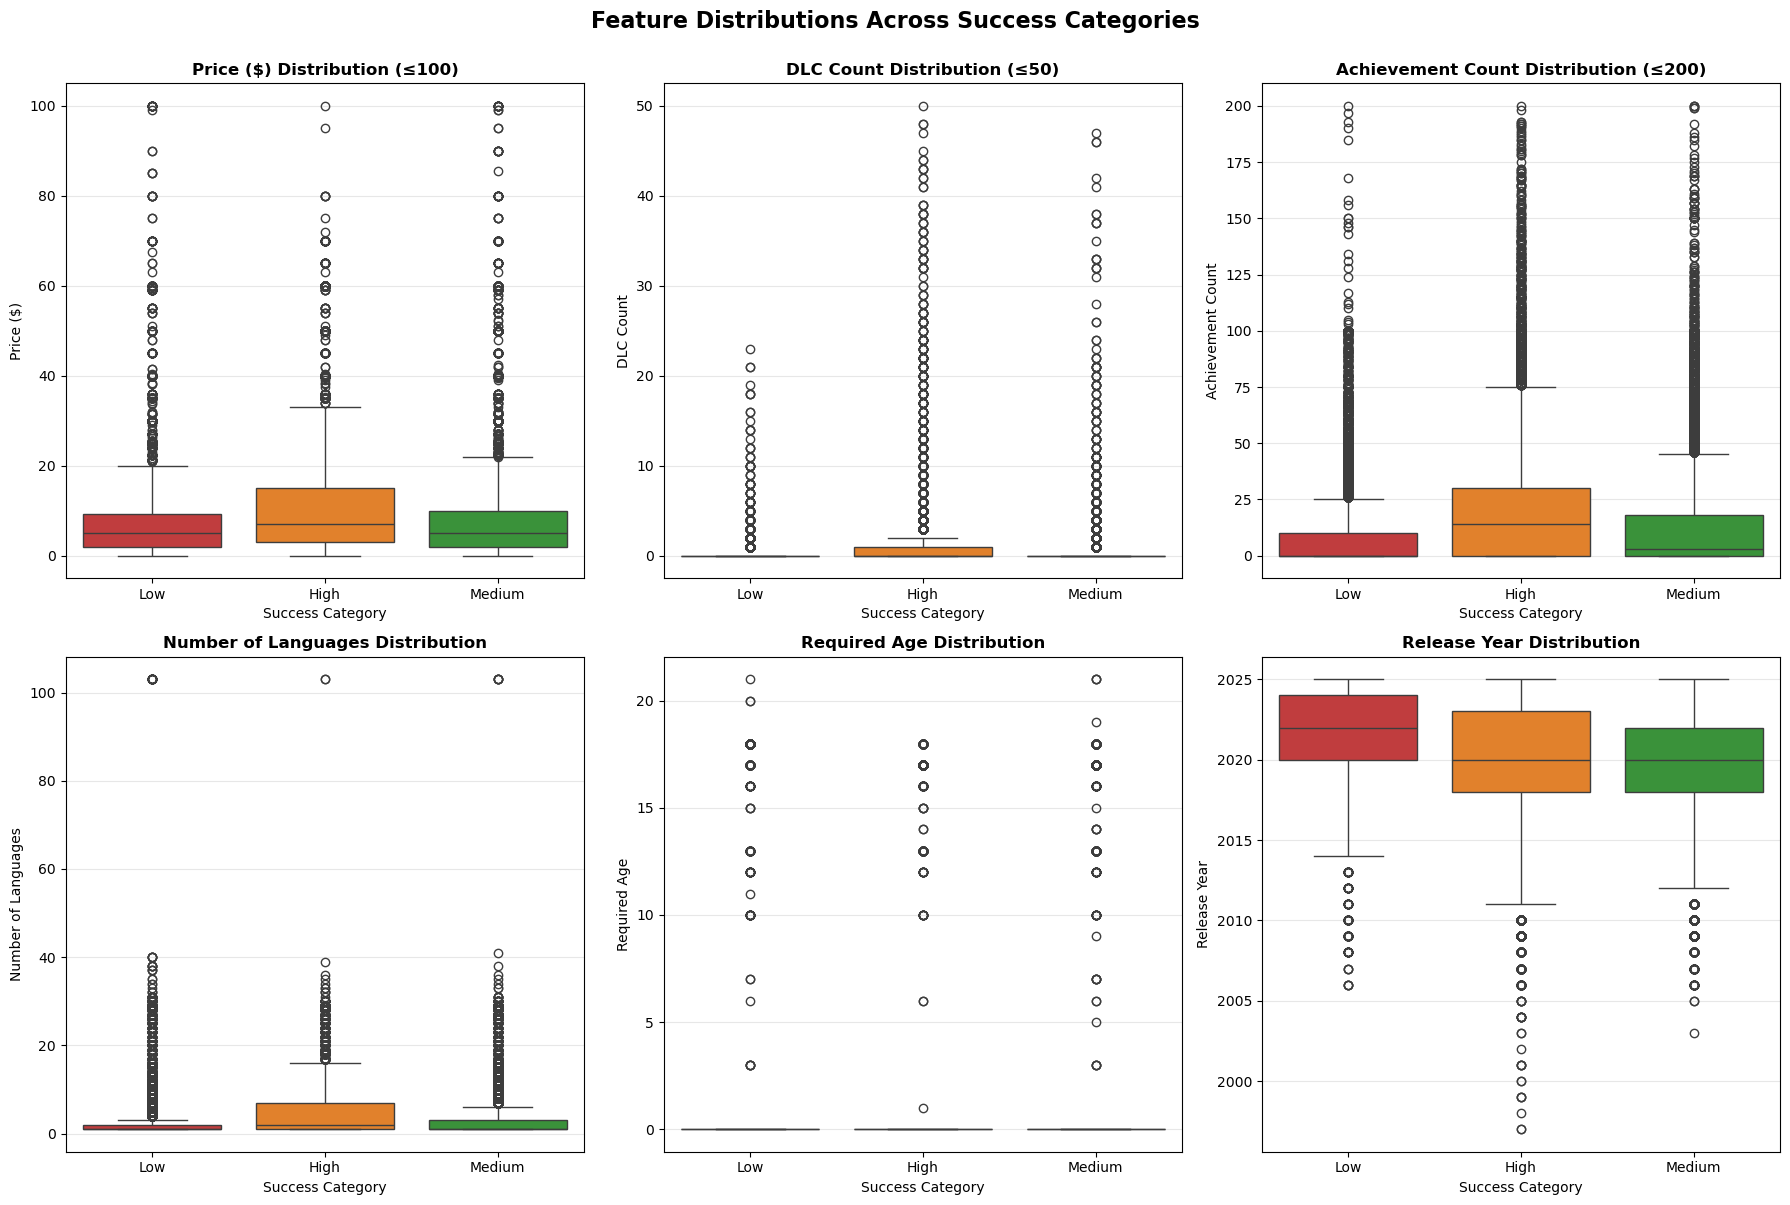


SUMMARY STATISTICS BY SUCCESS CATEGORY

Price ($):
--------------------------------------------------------------------------------
                            Mean  Median  Std Dev
Success_Category_Balanced                        
High                       10.19    6.99    10.82
Low                         7.37    4.99    15.37
Medium                      7.45    4.99    11.52


DLC Count:
--------------------------------------------------------------------------------
                           Mean  Median  Std Dev
Success_Category_Balanced                       
High                       1.24     0.0    24.34
Low                        0.18     0.0     2.63
Medium                     0.33     0.0     7.12


Achievement Count:
--------------------------------------------------------------------------------
                            Mean  Median  Std Dev
Success_Category_Balanced                        
High                       27.81    14.0   151.85
Low                       

In [103]:
# Feature distribution boxplots
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Feature Distributions Across Success Categories', fontsize=16, fontweight='bold', y=1.00)

# Define features to analyze
features_to_plot = [
    ('Price', 'Price ($)', 100),  # (column, label, outlier_threshold)
    ('DLC count', 'DLC Count', 50),
    ('Achievements', 'Achievement Count', 200),
    ('Language_Count', 'Number of Languages', None),
    ('Required age', 'Required Age', None),
    ('Release year', 'Release Year', None)
]

for idx, (feature, label, outlier_threshold) in enumerate(features_to_plot):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    # Filter outliers if threshold specified
    if outlier_threshold:
        data_to_plot = df_selected[df_selected[feature] <= outlier_threshold]
        title_suffix = f' (≤{outlier_threshold})'
    else:
        data_to_plot = df_selected
        title_suffix = ''
    
    # Create boxplot
    sns.boxplot(x='Success_Category_Balanced', y=feature, data=data_to_plot, 
                palette=['#d62728', '#ff7f0e', '#2ca02c'], ax=ax)
    
    ax.set_title(f'{label} Distribution{title_suffix}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Success Category')
    ax.set_ylabel(label)
    ax.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print summary statistics for each feature by success category
print("\n" + "="*80)
print("SUMMARY STATISTICS BY SUCCESS CATEGORY")
print("="*80)

for feature, label, _ in features_to_plot:
    print(f"\n{label}:")
    print("-" * 80)
    summary = df_selected.groupby('Success_Category_Balanced')[feature].describe()[['mean', '50%', 'std']]
    summary.columns = ['Mean', 'Median', 'Std Dev']
    print(summary.round(2))
    print()

**Note on Outliers:**
The presence of extreme outliers across price, achievements, and DLC counts reflects Steam’s highly skewed market structure. 
A small subset of AAA or well-funded titles (top 1–2%) naturally have far higher feature richness than the majority of indie games.
These are not data errors but represent *genuine market extremes*, so they are retained for modeling to preserve real-world variance.


### Numeric Feature Distributions Across Success Categories

**Key Findings:**
- **Price ($)**: High-success games show slightly higher median prices and a wider range, supporting earlier findings that moderately premium pricing ($10–$30) is linked to better outcomes.
- **DLC Count:** High-success games tend to have more DLCs on average, though the median remains near zero—indicating DLCs are a *post-success* monetization trend, not a guaranteed pre-launch predictor.
- **Achievements:** Clear upward shift in median achievements for high-success games—strong indicator of engagement and production quality.
- **Number of Languages:** High-success games generally support more languages; some extreme outliers (20+ languages) appear only in high-success titles.
- **Required Age:** No visible difference across success categories; age restrictions show minimal predictive relevance.
- **Release Year:** High-success titles are skewed toward slightly older years, reinforcing the earlier insight that recent games face tougher competition.

**Takeaway:**
Higher success tends to align with richer feature sets—moderate pricing, more achievements, and broader localization. However, most numeric predictors show substantial overlap between classes, implying that **success is multifactorial** and not driven by any single numeric attribute.

**Drawback:**
While these distributions confirm earlier trends, they don’t capture *interactions* between variables (e.g., price × platform or language × genre). Further feature engineering will be needed to uncover those patterns.


## 16. EDA Summary and Key Insights

### 🎯 Key Success Drivers:

**1. Genre & Categories:**
- Strategy (27% High), RPG (24% High), Multiplayer (18% High) drive success
- Genre combinations matter more than single genres
- Steam features (Achievements, Cloud, Controller Support) boost engagement

**2. Market Reach:**
- **Languages**: 10+ languages → 41% high-success rate vs. single language lowest
- **Platforms**: All 3 platforms → 39% high-success vs. Windows-only → 23%
- Cross-platform and multilingual games significantly outperform

**3. Pricing:**
- Optimal range: $10–$30 (balances value and quality perception)
- Premium titles ($20–$30+) have highest success proportion (40–45%)
- Free games achieve visibility but limited monetized success

**4. Temporal Trends:**
- Pre-2015: 49% high-success (low competition)
- 2021–2024: 37% low-success (market saturation)
- Average success score declined from ~0.45 (2006-2013) to ~0.27 (2021-2024)
- **Critical insight**: Market timing matters—newer games face intense competition

**5. Numeric Features:**
- **Top correlations**: has_website (r=0.22), Mac (r=0.14), has_support_url (r=0.13), Language_Count (r=0.11)
- **Negative**: Release year (r=-0.26) confirms recency hurts success
- **Distribution insights**: High-success games have more achievements, languages, moderate pricing—but success is **multifactorial**, no single feature dominates

### 📊 For Modeling:
- **High priority**: Genres, Categories, Language count, Platform support
- **Medium priority**: Price range, Achievements, Developer support features
- **Low priority**: DLC count, Required age

### 🔧 Next Steps:
Feature engineering, handle categorical variables, address interactions between features

In [104]:
df.head()

,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,Supported languages,...,Estimated owners numeric,has_website,has_support_url,has_support_email,positive_ratio,estimated_owners_norm,playtime_norm,release_year_norm,success_score,Success_Category_Balanced
20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,10000.0,1,0,0,0.333333,0.0,0.0,0.392857,0.172619,Low
655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,10000.0,1,0,1,0.898305,0.0,0.0,0.714286,0.430751,High
1732930,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,10000.0,0,0,1,0.000000,0.0,0.0,0.857143,0.085714,Low
1355720,Henosis™,2020-07-23,0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,10000.0,1,1,1,0.750000,0.0,0.0,0.821429,0.382143,Medium
1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,10000.0,1,1,1,0.847458,0.0,0.0,0.821429,0.421126,Medium


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89361 entries, 20200 to 3183790
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Name                        89360 non-null  object        
 1   Release date                89239 non-null  datetime64[ns]
 2   Estimated owners            89361 non-null  object        
 3   Peak CCU                    89361 non-null  int64         
 4   Required age                89361 non-null  int64         
 5   Price                       89361 non-null  float64       
 6   Discount                    89361 non-null  int64         
 7   DLC count                   89361 non-null  int64         
 8   About the game              89255 non-null  object        
 9   Supported languages         89361 non-null  object        
 10  Full audio languages        89361 non-null  object        
 11  Reviews                     10235 non-null  object   

## 17. Feature Engineering

Transform the cleaned data into model-ready features with proper encoding, composite features, and interactions.

### Step 1: Create Composite Features

We'll create aggregated features that combine related information.

In [106]:
# Create a copy for feature engineering
df_fe = df_selected.copy()

print(f"Starting feature engineering with {df_fe.shape[0]} games and {df_fe.shape[1]} features")
print("="*60)

# 1. Platform Count (how many platforms supported)
df_fe['Platform_Count'] = df_fe['Windows'].astype(int) + df_fe['Mac'].astype(int) + df_fe['Linux'].astype(int)

# 2. Support Features Count (developer support level)
df_fe['Support_Count'] = df_fe['has_website'] + df_fe['has_support_url'] + df_fe['has_support_email']

# 3. Is Free (binary flag for free games)
df_fe['Is_Free'] = (df_fe['Price'] == 0).astype(int)

# 4. Price Category (binned pricing)
def categorize_price_level(price):
    if price == 0:
        return 'Free'
    elif price <= 5:
        return 'Budget'
    elif price <= 10:
        return 'Low'
    elif price <= 20:
        return 'Medium'
    elif price <= 30:
        return 'High'
    else:
        return 'Premium'

df_fe['Price_Category'] = df_fe['Price'].apply(categorize_price_level)

# 5. Language Category (binned language support)
def categorize_language_level(count):
    if count == 0:
        return 'None'
    elif count == 1:
        return 'Single'
    elif count <= 5:
        return 'Few'
    elif count <= 10:
        return 'Many'
    else:
        return 'Extensive'

df_fe['Language_Category'] = df_fe['Language_Count'].apply(categorize_language_level)

# 6. Release Period (categorical time periods)
def categorize_release_period(year):
    if year < 2015:
        return 'Pre-2015'
    elif year < 2018:
        return '2015-2017'
    elif year < 2021:
        return '2018-2020'
    else:
        return '2021-2024'

df_fe['Release_Period'] = df_fe['Release year'].apply(categorize_release_period)

print("\nComposite Features Created:")
print(f"  - Platform_Count: {df_fe['Platform_Count'].value_counts().to_dict()}")
print(f"  - Support_Count: {df_fe['Support_Count'].value_counts().to_dict()}")
print(f"  - Is_Free: {df_fe['Is_Free'].sum()} free games")
print(f"  - Price_Category: {df_fe['Price_Category'].value_counts().to_dict()}")
print(f"  - Language_Category: {df_fe['Language_Category'].value_counts().to_dict()}")
print(f"  - Release_Period: {df_fe['Release_Period'].value_counts().to_dict()}")

Starting feature engineering with 89238 games and 27 features

Composite Features Created:
  - Platform_Count: {1: 69057, 2: 11072, 3: 9109}
  - Support_Count: {1: 38475, 2: 25134, 3: 25082, 0: 547}
  - Is_Free: 7860 free games
  - Price_Category: {'Budget': 40161, 'Low': 21133, 'Medium': 15027, 'Free': 7860, 'High': 2988, 'Premium': 2069}
  - Language_Category: {'Single': 49413, 'Few': 22337, 'Many': 9772, 'Extensive': 7716}
  - Release_Period: {'2021-2024': 46638, '2018-2020': 25489, '2015-2017': 13376, 'Pre-2015': 3735}


### Step 2: Extract Genre and Category Features

Split multi-value fields (Genres, Categories) into binary features using one-hot encoding for the most common ones.

In [107]:
# Extract top genres as binary features
def extract_top_items(series, top_n=15):
    """Extract the top N most common items from comma-separated strings"""
    item_counts = {}
    for items_str in series:
        if items_str != 'Unknown' and pd.notna(items_str):
            for item in items_str.split(','):
                item = item.strip()
                item_counts[item] = item_counts.get(item, 0) + 1
    
    # Get top N items
    top_items = sorted(item_counts.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return [item[0] for item in top_items]

# Get top 15 genres
top_genres = extract_top_items(df_fe['Genres'], top_n=15)
print("Top 15 Genres for encoding:")
print(top_genres)

# Create binary columns for each top genre
for genre in top_genres:
    col_name = f'genre_{genre.replace(" ", "_").replace("-", "_")}'
    df_fe[col_name] = df_fe['Genres'].apply(lambda x: 1 if genre in str(x) else 0)
    print(f"  {col_name}: {df_fe[col_name].sum()} games")

print(f"\nCreated {len(top_genres)} genre features")

Top 15 Genres for encoding:
['Indie', 'Casual', 'Action', 'Adventure', 'Simulation', 'Strategy', 'RPG', 'Early Access', 'Sports', 'Free to Play', 'Racing', 'Massively Multiplayer', 'Utilities', 'Violent', 'Design & Illustration']
  genre_Indie: 62815 games
  genre_Casual: 37659 games
  genre_Action: 36539 games
  genre_Adventure: 34831 games
  genre_Simulation: 18089 games
  genre_Strategy: 17039 games
  genre_Indie: 62815 games
  genre_Casual: 37659 games
  genre_Action: 36539 games
  genre_Adventure: 34831 games
  genre_Simulation: 18089 games
  genre_Strategy: 17039 games
  genre_RPG: 15957 games
  genre_Early_Access: 11584 games
  genre_Sports: 4049 games
  genre_Free_to_Play: 3615 games
  genre_Racing: 3314 games
  genre_Massively_Multiplayer: 1860 games
  genre_Utilities: 865 games
  genre_Violent: 523 games
  genre_Design_&_Illustration: 515 games

Created 15 genre features
  genre_RPG: 15957 games
  genre_Early_Access: 11584 games
  genre_Sports: 4049 games
  genre_Free_to_Play

In [108]:
# Get top 15 categories
top_categories = extract_top_items(df_fe['Categories'], top_n=15)
print("\nTop 15 Categories for encoding:")
print(top_categories)

# Create binary columns for each top category
for category in top_categories:
    col_name = f'cat_{category.replace(" ", "_").replace("-", "_")}'
    df_fe[col_name] = df_fe['Categories'].apply(lambda x: 1 if category in str(x) else 0)
    print(f"  {col_name}: {df_fe[col_name].sum()} games")

print(f"\nCreated {len(top_categories)} category features")


Top 15 Categories for encoding:
['Single-player', 'Steam Achievements', 'Steam Cloud', 'Full controller support', 'Multi-player', 'Family Sharing', 'Partial Controller Support', 'Steam Trading Cards', 'PvP', 'Co-op', 'Steam Leaderboards', 'Online PvP', 'Remote Play Together', 'Shared/Split Screen', 'Online Co-op']
  cat_Single_player: 84487 games
  cat_Steam_Achievements: 41926 games
  cat_Steam_Cloud: 22062 games
  cat_Full_controller_support: 18541 games
  cat_Multi_player: 15849 games
  cat_Steam_Achievements: 41926 games
  cat_Steam_Cloud: 22062 games
  cat_Full_controller_support: 18541 games
  cat_Multi_player: 15849 games
  cat_Family_Sharing: 14321 games
  cat_Partial_Controller_Support: 11276 games
  cat_Family_Sharing: 14321 games
  cat_Partial_Controller_Support: 11276 games
  cat_Steam_Trading_Cards: 9990 games
  cat_PvP: 9812 games
  cat_Co_op: 8258 games
  cat_Steam_Leaderboards: 7371 games
  cat_Steam_Trading_Cards: 9990 games
  cat_PvP: 9812 games
  cat_Co_op: 8258 gam

### Step 3: Handle High-Cardinality Features (Developers & Publishers)

For developers and publishers, we'll create aggregated features based on their track record.

In [109]:
# Developer and Publisher features
# Strategy: Group by frequency and average success score

# Developer game count and average success
dev_stats = df_fe.groupby('Developers').agg({
    'success_score': ['mean', 'count']
}).reset_index()
dev_stats.columns = ['Developers', 'dev_avg_success', 'dev_game_count']

# Publisher game count and average success
pub_stats = df_fe.groupby('Publishers').agg({
    'success_score': ['mean', 'count']
}).reset_index()
pub_stats.columns = ['Publishers', 'pub_avg_success', 'pub_game_count']

# Merge back to main dataframe
df_fe = df_fe.merge(dev_stats, on='Developers', how='left')
df_fe = df_fe.merge(pub_stats, on='Publishers', how='left')

# Create categorical bins for developer/publisher experience
df_fe['dev_experience'] = pd.cut(df_fe['dev_game_count'], 
                                  bins=[0, 1, 5, 10, 50, float('inf')],
                                  labels=['Single', 'Few', 'Multiple', 'Many', 'Prolific'])

df_fe['pub_experience'] = pd.cut(df_fe['pub_game_count'], 
                                  bins=[0, 1, 5, 10, 50, float('inf')],
                                  labels=['Single', 'Few', 'Multiple', 'Many', 'Prolific'])

print("Developer & Publisher Features:")
print("="*60)
print(f"Developer average success range: {df_fe['dev_avg_success'].min():.3f} - {df_fe['dev_avg_success'].max():.3f}")
print(f"Publisher average success range: {df_fe['pub_avg_success'].min():.3f} - {df_fe['pub_avg_success'].max():.3f}")
print(f"\nDeveloper experience distribution:")
print(df_fe['dev_experience'].value_counts().sort_index())
print(f"\nPublisher experience distribution:")
print(df_fe['pub_experience'].value_counts().sort_index())

Developer & Publisher Features:
Developer average success range: 0.043 - 0.727
Publisher average success range: 0.043 - 0.711

Developer experience distribution:
dev_experience
Single      42981
Few         27374
Multiple     7098
Many         9130
Prolific     2655
Name: count, dtype: int64

Publisher experience distribution:
pub_experience
Single      37487
Few         23637
Multiple     6432
Many        13027
Prolific     8655
Name: count, dtype: int64


### Step 4: Encode Categorical Features

One-hot encode the categorical features we created.

In [110]:
# One-hot encode categorical features
categorical_features = ['Price_Category', 'Language_Category', 'Release_Period', 
                        'dev_experience', 'pub_experience', 'Platform_Support']

# Create dummy variables
df_encoded = pd.get_dummies(df_fe, columns=categorical_features, drop_first=True, dtype=int)

print(f"After one-hot encoding:")
print(f"  Features before: {df_fe.shape[1]}")
print(f"  Features after: {df_encoded.shape[1]}")
print(f"  New features added: {df_encoded.shape[1] - df_fe.shape[1]}")

# Show new column names
new_cols = [col for col in df_encoded.columns if col not in df_fe.columns]
print(f"\nNew encoded columns ({len(new_cols)}):")
for col in sorted(new_cols):
    print(f"  - {col}")

After one-hot encoding:
  Features before: 67
  Features after: 83
  New features added: 16

New encoded columns (22):
  - Language_Category_Few
  - Language_Category_Many
  - Language_Category_Single
  - Platform_Support_Mac/Linux Only
  - Platform_Support_Two Platforms
  - Platform_Support_Windows Only
  - Price_Category_Free
  - Price_Category_High
  - Price_Category_Low
  - Price_Category_Medium
  - Price_Category_Premium
  - Release_Period_2018-2020
  - Release_Period_2021-2024
  - Release_Period_Pre-2015
  - dev_experience_Few
  - dev_experience_Many
  - dev_experience_Multiple
  - dev_experience_Prolific
  - pub_experience_Few
  - pub_experience_Many
  - pub_experience_Multiple
  - pub_experience_Prolific


### Step 5: Select Final Feature Set for Modeling

Choose only the features we need for prediction (exclude target variables and identifiers).

In [111]:
# Features to exclude (identifiers, raw text, and target variables)
exclude_features = [
    'Name',  # Identifier
    'Genres', 'Categories', 'Tags', 'Supported languages',  # Raw text (already encoded)
    'Developers', 'Publishers',  # High cardinality (already encoded as aggregates)
    'success_score',  # Target (continuous)
    'Success_Category_Balanced',  # Target (categorical)
    'Estimated owners numeric',  # Used in target calculation (data leakage)
    'Release date',  # Already have Release year
]

# Get all feature columns
all_features = [col for col in df_encoded.columns if col not in exclude_features]

# Separate into feature categories for inspection
numeric_features = ['Price', 'Required age', 'DLC count', 'Achievements', 'Release year',
                    'Language_Count', 'Platform_Count', 'Support_Count',
                    'dev_avg_success', 'dev_game_count', 'pub_avg_success', 'pub_game_count']

binary_features = ['Windows', 'Mac', 'Linux', 'Has_English', 'Is_Free',
                   'has_website', 'has_support_url', 'has_support_email']

# Genre features (binary)
genre_features = [col for col in all_features if col.startswith('genre_')]

# Category features (binary)
category_features = [col for col in all_features if col.startswith('cat_')]

# Encoded categorical features
encoded_features = [col for col in all_features if any(col.startswith(prefix) for prefix in 
                    ['Price_Category_', 'Language_Category_', 'Release_Period_', 
                     'dev_experience_', 'pub_experience_', 'Platform_Support_'])]

print("Feature Set Summary:")
print("="*60)
print(f"Total features for modeling: {len(all_features)}")
print(f"  - Numeric features: {len(numeric_features)}")
print(f"  - Binary features: {len(binary_features)}")
print(f"  - Genre features: {len(genre_features)}")
print(f"  - Category features: {len(category_features)}")
print(f"  - Encoded categorical: {len(encoded_features)}")

# Create final modeling dataset
X = df_encoded[all_features].copy()
y_continuous = df_encoded['success_score'].copy()
y_categorical = df_encoded['Success_Category_Balanced'].copy()

print(f"\nFinal Dataset Shape:")
print(f"  X (features): {X.shape}")
print(f"  y_continuous (success_score): {y_continuous.shape}")
print(f"  y_categorical (Success_Category): {y_categorical.shape}")
print(f"\nMissing values in X: {X.isnull().sum().sum()}")
print(f"Missing values in y_continuous: {y_continuous.isnull().sum()}")
print(f"Missing values in y_categorical: {y_categorical.isnull().sum()}")

Feature Set Summary:
Total features for modeling: 73
  - Numeric features: 12
  - Binary features: 8
  - Genre features: 15
  - Category features: 15
  - Encoded categorical: 22

Final Dataset Shape:
  X (features): (89238, 73)
  y_continuous (success_score): (89238,)
  y_categorical (Success_Category): (89238,)

Missing values in X: 0
Missing values in y_continuous: 0
Missing values in y_categorical: 0

Final Dataset Shape:
  X (features): (89238, 73)
  y_continuous (success_score): (89238,)
  y_categorical (Success_Category): (89238,)

Missing values in X: 0
Missing values in y_continuous: 0
Missing values in y_categorical: 0


### Step 6: Handle Missing Values in Features

Check and handle any remaining missing values in the feature set.

In [112]:
# Check for missing values
missing_summary = X.isnull().sum()
missing_features = missing_summary[missing_summary > 0].sort_values(ascending=False)

if len(missing_features) > 0:
    print("Features with missing values:")
    print("="*60)
    for feature, count in missing_features.items():
        pct = (count / len(X)) * 100
        print(f"  {feature}: {count} ({pct:.2f}%)")
    
    # Handle missing values
    # For numeric features: fill with median
    # For binary features: fill with 0 (most common)
    
    for feature in missing_features.index:
        if feature in numeric_features:
            median_val = X[feature].median()
            X[feature].fillna(median_val, inplace=True)
            print(f"\nFilled {feature} with median: {median_val:.2f}")
        else:
            X[feature].fillna(0, inplace=True)
            print(f"\nFilled {feature} with 0 (binary/encoded)")
    
    print(f"\nRemaining missing values: {X.isnull().sum().sum()}")
else:
    print("No missing values found in feature set! ✅")

No missing values found in feature set! ✅


### Step 7: Feature Engineering Summary

Review what we've accomplished and prepare for modeling.

In [113]:
df_encoded.head()

,success_score,Success_Category_Balanced,Estimated owners numeric,Price,Required age,DLC count,Achievements,Release year,Developers,Publishers,...,dev_experience_Multiple,dev_experience_Many,dev_experience_Prolific,pub_experience_Few,pub_experience_Multiple,pub_experience_Many,pub_experience_Prolific,Platform_Support_Mac/Linux Only,Platform_Support_Two Platforms,Platform_Support_Windows Only
0,0.172619,Low,10000.0,19.99,0,0,30,2008.0,Perpetual FX Creative,Perpetual FX Creative,...,0,0,0,0,0,0,0,0,0,1
1,0.430751,High,10000.0,0.99,0,0,12,2017.0,Rusty Moyher,Wild Rooster,...,0,0,0,1,0,0,0,0,1,0
2,0.085714,Low,10000.0,4.99,0,0,0,2021.0,Campião Games,Campião Games,...,0,0,0,0,0,0,0,0,0,1
3,0.382143,Medium,10000.0,5.99,0,0,0,2020.0,Odd Critter Games,Odd Critter Games,...,0,0,0,0,0,0,0,0,0,0
4,0.421126,Medium,10000.0,0.00,0,0,17,2020.0,Unusual Games,Unusual Games,...,0,0,0,0,0,0,0,0,1,0


In [114]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89238 entries, 0 to 89237
Data columns (total 83 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   success_score                    89238 non-null  float64
 1   Success_Category_Balanced        89238 non-null  object 
 2   Estimated owners numeric         89238 non-null  float64
 3   Price                            89238 non-null  float64
 4   Required age                     89238 non-null  int64  
 5   DLC count                        89238 non-null  int64  
 6   Achievements                     89238 non-null  int64  
 7   Release year                     89238 non-null  float64
 8   Developers                       89238 non-null  object 
 9   Publishers                       89238 non-null  object 
 10  Genres                           89238 non-null  object 
 11  Categories                       89238 non-null  object 
 12  Tags              

## 18. Machine Learning - Random Forest Classifier

Build a Random Forest model to predict game success categories (Low/Medium/High).

### Step 1: Prepare Data for Modeling

Split data into train/validation/test sets and handle any preprocessing needed.

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

print("Preparing data for Random Forest Classification")
print("="*60)

# Check if we have X and y_categorical from feature engineering
# If not, recreate them
if 'X' not in locals() or 'y_categorical' not in locals():
    print("Recreating feature and target datasets...")
    
    # Features to exclude
    exclude_features = [
        'Name', 'Genres', 'Categories', 'Tags', 'Supported languages',
        'Developers', 'Publishers', 'success_score', 'Success_Category_Balanced',
        'Estimated owners numeric', 'Price_Range'
    ]
    
    # Get feature columns
    all_features = [col for col in df_encoded.columns if col not in exclude_features]
    
    X = df_encoded[all_features].copy()
    y_categorical = df_encoded['Success_Category_Balanced'].copy()

# Remove any remaining missing values
print(f"\nOriginal dataset: {X.shape}")
print(f"Missing values in X: {X.isnull().sum().sum()}")
print(f"Missing values in y: {y_categorical.isnull().sum()}")

# Drop rows with missing target
mask = y_categorical.notna()
X = X[mask]
y_categorical = y_categorical[mask]

# Fill any missing values in features with median/mode
for col in X.columns:
    if X[col].isnull().sum() > 0:
        if X[col].dtype in ['float64', 'int64']:
            X[col].fillna(X[col].median(), inplace=True)
        else:
            X[col].fillna(X[col].mode()[0], inplace=True)

print(f"\nCleaned dataset: {X.shape}")
print(f"Target distribution:")
print(y_categorical.value_counts())
print(f"Target distribution (%):")
print(y_categorical.value_counts(normalize=True) * 100)

Preparing data for Random Forest Classification

Original dataset: (89238, 73)
Missing values in X: 0
Missing values in y: 0

Cleaned dataset: (89238, 73)
Target distribution:
Success_Category_Balanced
Medium    41394
Low       24682
High      23162
Name: count, dtype: int64
Target distribution (%):
Success_Category_Balanced
Medium    46.386069
Low       27.658621
High      25.955311
Name: proportion, dtype: float64


In [124]:
# Split data: 70% train, 15% validation, 15% test
# First split: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_categorical, test_size=0.30, random_state=42, stratify=y_categorical
)

# Second split: split temp into 50-50 for validation and test (15% each of original)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

print("\nData split summary:")
print("="*60)
print(f"Training set:   {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]:,} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set:       {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Total features: {X_train.shape[1]}")

print("\nTarget distribution in each set:")
print("\nTraining:")
print(y_train.value_counts())
print("\nValidation:")
print(y_val.value_counts())
print("\nTest:")
print(y_test.value_counts())


Data split summary:
Training set:   62,466 samples (70.0%)
Validation set: 13,386 samples (15.0%)
Test set:       13,386 samples (15.0%)
Total features: 73

Target distribution in each set:

Training:
Success_Category_Balanced
Medium    28976
Low       17277
High      16213
Name: count, dtype: int64

Validation:
Success_Category_Balanced
Medium    6209
Low       3703
High      3474
Name: count, dtype: int64

Test:
Success_Category_Balanced
Medium    6209
Low       3702
High      3475
Name: count, dtype: int64


In [125]:
# Check for and remove any string/object columns before training
print("Checking data types in feature set...")
print("="*60)

# Identify object/string columns
object_cols = X.select_dtypes(include=['object']).columns.tolist()

if len(object_cols) > 0:
    print(f"\n⚠️  Found {len(object_cols)} string/object columns that need to be removed:")
    for col in object_cols:
        print(f"  - {col}: {X[col].dtype}")
        print(f"    Sample values: {X[col].unique()[:5]}")
    
    print(f"\nRemoving these columns from X, X_train, X_val, X_test...")
    X = X.drop(columns=object_cols)
    X_train = X_train.drop(columns=object_cols)
    X_val = X_val.drop(columns=object_cols)
    X_test = X_test.drop(columns=object_cols)
    
    print(f"✅ Removed {len(object_cols)} columns")
    print(f"New shape: {X.shape}")
else:
    print("✅ No string/object columns found - all features are numeric!")

print(f"\nFinal data types:")
print(X.dtypes.value_counts())

Checking data types in feature set...

⚠️  Found 1 string/object columns that need to be removed:
  - Price_Range: object
    Sample values: ['$10-$20' '$0.01-$5' '$5-$10' 'Free ($0)' '$20-$30']

Removing these columns from X, X_train, X_val, X_test...
✅ Removed 1 columns
New shape: (89238, 72)

Final data types:
int64      65
float64     4
bool        3
Name: count, dtype: int64


### Step 2: Feature Scaling

Scale numeric features to improve model performance.

In [126]:
# Identify numeric columns to scale
numeric_cols = ['Price', 'Required age', 'DLC count', 'Achievements', 'Release year',
                'Language_Count', 'Platform_Count', 'Support_Count',
                'dev_avg_success', 'dev_game_count', 'pub_avg_success', 'pub_game_count']

# Filter to only those that exist in X
numeric_cols = [col for col in numeric_cols if col in X.columns]

print(f"Scaling {len(numeric_cols)} numeric features:")
print(numeric_cols)

# Initialize scaler and fit on training data only
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

# Scale numeric columns
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_val_scaled[numeric_cols] = scaler.transform(X_val[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("\nScaling complete! ✅")
print(f"Sample scaled values (first 5 rows of 'Price'):")
print(X_train_scaled['Price'].head())

Scaling 12 numeric features:
['Price', 'Required age', 'DLC count', 'Achievements', 'Release year', 'Language_Count', 'Platform_Count', 'Support_Count', 'dev_avg_success', 'dev_game_count', 'pub_avg_success', 'pub_game_count']

Scaling complete! ✅
Sample scaled values (first 5 rows of 'Price'):
38175    0.140474
85774   -0.238011
33675    0.518959
68136   -0.615740
55962    0.140474
Name: Price, dtype: float64


### Step 3: Train Baseline Random Forest Model

Start with a baseline Random Forest classifier with default parameters.

In [127]:
# Train baseline Random Forest
print("Training Baseline Random Forest Classifier...")
print("="*60)

rf_baseline = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,  # Use all CPU cores
    verbose=1
)

# Train on scaled data
rf_baseline.fit(X_train_scaled, y_train)

# Predictions on validation set
y_val_pred = rf_baseline.predict(X_val_scaled)

# Evaluate
val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

print("\n" + "="*60)
print("BASELINE MODEL PERFORMANCE")
print("="*60)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")
print(f"Validation F1-Score (weighted): {val_f1:.4f}")

print("\nClassification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))

Training Baseline Random Forest Classifier...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished



BASELINE MODEL PERFORMANCE

Validation Accuracy: 0.8581
Validation F1-Score (weighted): 0.8581

Classification Report (Validation Set):
              precision    recall  f1-score   support

        High       0.87      0.82      0.84      3474
         Low       0.89      0.85      0.87      3703
      Medium       0.83      0.88      0.86      6209

    accuracy                           0.86     13386
   macro avg       0.87      0.85      0.86     13386
weighted avg       0.86      0.86      0.86     13386



### Step 4: Feature Importance Analysis

Identify which features are most important for predicting success.

Top 20 Most Important Features:
                        feature  importance
46              dev_avg_success    0.334170
48              pub_avg_success    0.272428
47               dev_game_count    0.031093
0                         Price    0.030230
49               pub_game_count    0.029942
3                  Achievements    0.028916
4                  Release year    0.026444
12               Language_Count    0.015219
2                     DLC count    0.011292
33              cat_Steam_Cloud    0.009661
14                Support_Count    0.008178
59     Release_Period_2021-2024    0.007916
19              genre_Adventure    0.007332
18                 genre_Action    0.007257
17                 genre_Casual    0.007116
32       cat_Steam_Achievements    0.006585
61           dev_experience_Few    0.006101
16                  genre_Indie    0.005975
20             genre_Simulation    0.005837
34  cat_Full_controller_support    0.005703


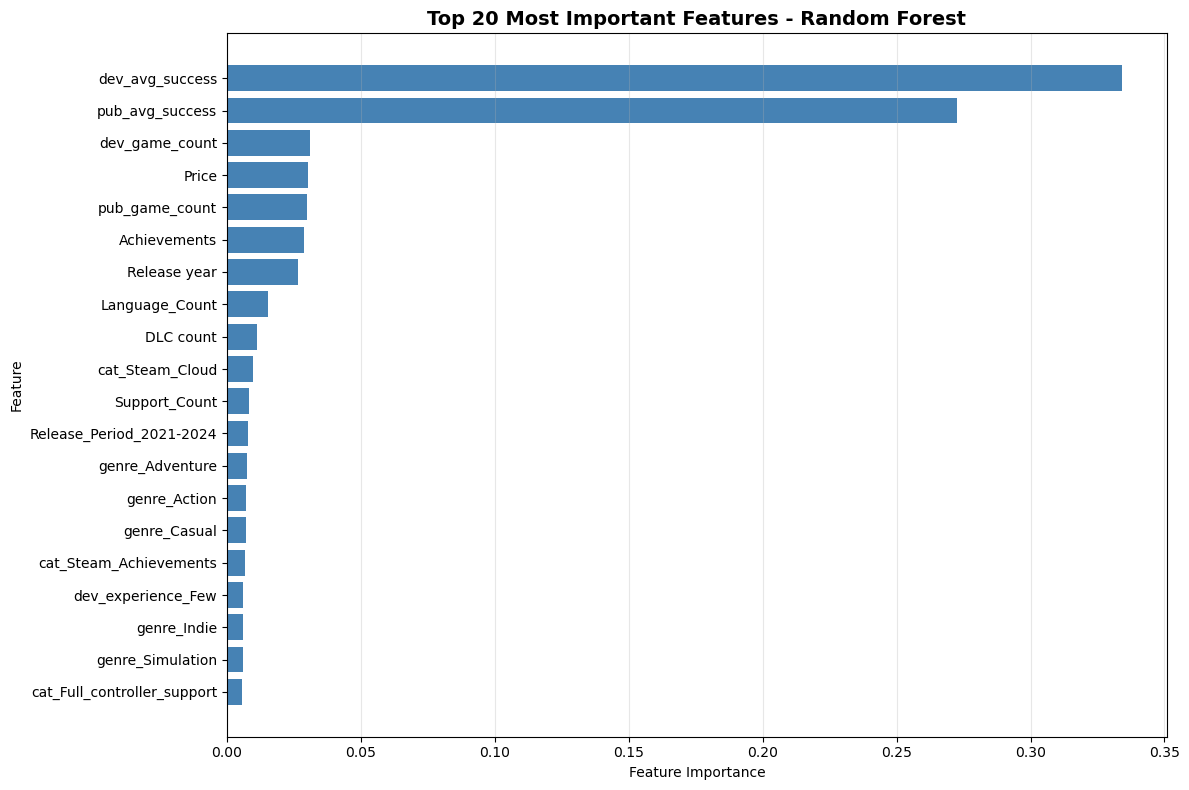


Feature Importance by Type:

Numeric: 0.1254 (12.54%)
  Number of features: 8

Developer/Publisher: 0.6676 (66.76%)
  Number of features: 4

Genres: 0.0561 (5.61%)
  Number of features: 15

Categories: 0.0543 (5.43%)
  Number of features: 15

Platforms: 0.0054 (0.54%)
  Number of features: 3

Support: 0.0161 (1.61%)
  Number of features: 4


In [128]:
# Get feature importances
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_baseline.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 20 Most Important Features:")
print("="*60)
print(feature_importances.head(20))

# Visualize top 20 features
plt.figure(figsize=(12, 8))
top_20 = feature_importances.head(20)
plt.barh(range(len(top_20)), top_20['importance'], color='steelblue')
plt.yticks(range(len(top_20)), top_20['feature'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Most Important Features - Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Group by feature type
print("\n" + "="*60)
print("Feature Importance by Type:")
print("="*60)

feature_types = {
    'Numeric': ['Price', 'Required age', 'DLC count', 'Achievements', 'Release year', 
                'Language_Count', 'Platform_Count', 'Support_Count'],
    'Developer/Publisher': ['dev_avg_success', 'dev_game_count', 'pub_avg_success', 'pub_game_count'],
    'Genres': [col for col in X_train.columns if col.startswith('genre_')],
    'Categories': [col for col in X_train.columns if col.startswith('cat_')],
    'Platforms': ['Windows', 'Mac', 'Linux'],
    'Support': ['has_website', 'has_support_url', 'has_support_email', 'Has_English']
}

for feature_type, features in feature_types.items():
    relevant_features = [f for f in features if f in feature_importances['feature'].values]
    if relevant_features:
        total_importance = feature_importances[feature_importances['feature'].isin(relevant_features)]['importance'].sum()
        print(f"\n{feature_type}: {total_importance:.4f} ({total_importance*100:.2f}%)")
        print(f"  Number of features: {len(relevant_features)}")

### Step 5: Hyperparameter Tuning

Optimize Random Forest parameters for better performance.

In [129]:
from sklearn.model_selection import RandomizedSearchCV

print("Hyperparameter Tuning with Randomized Search...")
print("="*60)

# Define parameter grid
param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Randomized search with cross-validation
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=20,  # Number of parameter combinations to try
    cv=3,  # 3-fold cross-validation
    scoring='f1_weighted',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on training data
random_search.fit(X_train_scaled, y_train)

print("\n" + "="*60)
print("BEST PARAMETERS FOUND:")
print("="*60)
for param, value in random_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest CV Score (F1-weighted): {random_search.best_score_:.4f}")

Hyperparameter Tuning with Randomized Search...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

BEST PARAMETERS FOUND:
  n_estimators: 300
  min_samples_split: 20
  min_samples_leaf: 1
  max_features: sqrt
  max_depth: 40
  class_weight: None
  bootstrap: False

Best CV Score (F1-weighted): 0.8630


In [131]:
# Get the best model
rf_tuned = random_search.best_estimator_

# Evaluate on validation set
y_val_pred_tuned = rf_tuned.predict(X_val_scaled)

val_accuracy_tuned = accuracy_score(y_val, y_val_pred_tuned)
val_f1_tuned = f1_score(y_val, y_val_pred_tuned, average='weighted')

print("\n" + "="*60)
print("TUNED MODEL PERFORMANCE")
print("="*60)
print(f"\nValidation Accuracy: {val_accuracy_tuned:.4f} (Baseline: {val_accuracy:.4f})")
print(f"Validation F1-Score: {val_f1_tuned:.4f} (Baseline: {val_f1:.4f})")
print(f"Improvement: {(val_f1_tuned - val_f1)*100:.2f}% in F1-Score")

print("\nClassification Report (Validation Set - Tuned Model):")
print(classification_report(y_val, y_val_pred_tuned))


TUNED MODEL PERFORMANCE

Validation Accuracy: 0.8641 (Baseline: 0.8581)
Validation F1-Score: 0.8641 (Baseline: 0.8581)
Improvement: 0.61% in F1-Score

Classification Report (Validation Set - Tuned Model):
              precision    recall  f1-score   support

        High       0.89      0.82      0.85      3474
         Low       0.90      0.86      0.88      3703
      Medium       0.83      0.89      0.86      6209

    accuracy                           0.86     13386
   macro avg       0.87      0.86      0.86     13386
weighted avg       0.87      0.86      0.86     13386



### Step 6: Final Evaluation on Test Set

Evaluate the best model on the held-out test set for unbiased performance estimate.

FINAL MODEL PERFORMANCE ON TEST SET

Test Accuracy: 0.8625
Test F1-Score (weighted): 0.8625

Classification Report (Test Set):
              precision    recall  f1-score   support

        High       0.88      0.82      0.85      3475
         Low       0.90      0.86      0.88      3702
      Medium       0.84      0.89      0.86      6209

    accuracy                           0.86     13386
   macro avg       0.87      0.86      0.86     13386
weighted avg       0.86      0.86      0.86     13386



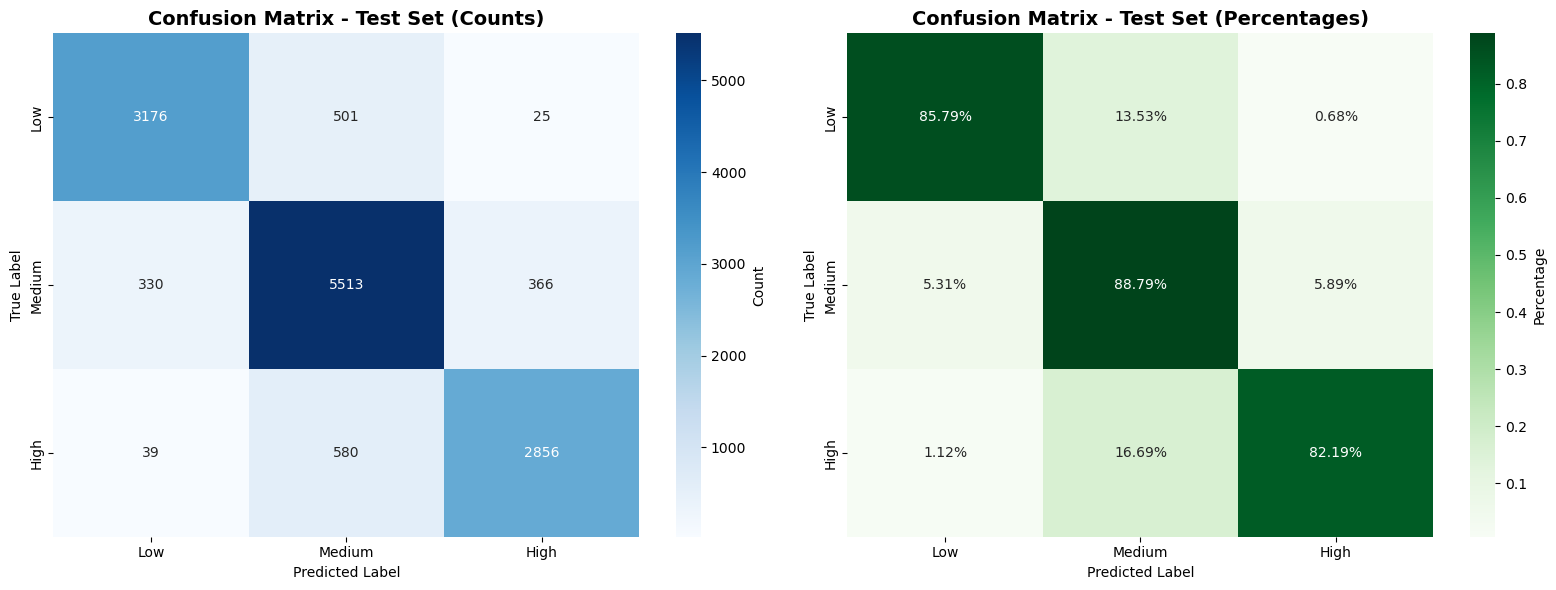


PER-CLASS PERFORMANCE (Test Set):

Low Success:
  Total samples: 3702
  Correctly predicted: 3176 (85.8%)
  Distribution of predictions:
    - Predicted as Low: 3176 (85.8%)
    - Predicted as Medium: 501 (13.5%)
    - Predicted as High: 25 (0.7%)

Medium Success:
  Total samples: 6209
  Correctly predicted: 5513 (88.8%)
  Distribution of predictions:
    - Predicted as Low: 330 (5.3%)
    - Predicted as Medium: 5513 (88.8%)
    - Predicted as High: 366 (5.9%)

High Success:
  Total samples: 3475
  Correctly predicted: 2856 (82.2%)
  Distribution of predictions:
    - Predicted as Low: 39 (1.1%)
    - Predicted as Medium: 580 (16.7%)
    - Predicted as High: 2856 (82.2%)


In [132]:
# Final evaluation on test set
y_test_pred = rf_tuned.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("="*60)
print("FINAL MODEL PERFORMANCE ON TEST SET")
print("="*60)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test F1-Score (weighted): {test_f1:.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix for test set
cm_test = confusion_matrix(y_test, y_test_pred, labels=['Low', 'Medium', 'High'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Confusion Matrix - counts
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'],
            cbar_kws={'label': 'Count'})
axes[0].set_title('Confusion Matrix - Test Set (Counts)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Confusion Matrix - percentages
cm_test_percent = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_test_percent, annot=True, fmt='.2%', cmap='Greens', ax=axes[1],
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'],
            cbar_kws={'label': 'Percentage'})
axes[1].set_title('Confusion Matrix - Test Set (Percentages)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

# Per-class performance
print("\n" + "="*60)
print("PER-CLASS PERFORMANCE (Test Set):")
print("="*60)
for i, label in enumerate(['Low', 'Medium', 'High']):
    true_count = (y_test == label).sum()
    correct = cm_test[i, i]
    accuracy_class = (correct / true_count) * 100
    print(f"\n{label} Success:")
    print(f"  Total samples: {true_count}")
    print(f"  Correctly predicted: {correct} ({accuracy_class:.1f}%)")
    print(f"  Distribution of predictions:")
    for j, pred_label in enumerate(['Low', 'Medium', 'High']):
        count = cm_test[i, j]
        pct = (count / true_count) * 100
        print(f"    - Predicted as {pred_label}: {count} ({pct:.1f}%)")

### Step 7: Model Summary and Insights

Summary of the Random Forest model performance and key takeaways.

In [133]:
# Get the best model
rf_tuned = random_search.best_estimator_

# Evaluate on validation set
y_val_pred_tuned = rf_tuned.predict(X_val_scaled)

val_accuracy_tuned = accuracy_score(y_val, y_val_pred_tuned)
val_f1_tuned = f1_score(y_val, y_val_pred_tuned, average='weighted')

print("\n" + "="*60)
print("TUNED MODEL PERFORMANCE")
print("="*60)
print(f"\nValidation Accuracy: {val_accuracy_tuned:.4f} (Baseline: {val_accuracy:.4f})")
print(f"Validation F1-Score: {val_f1_tuned:.4f} (Baseline: {val_f1:.4f})")
print(f"Improvement: {(val_f1_tuned - val_f1)*100:.2f}% in F1-Score")

print("\nClassification Report (Validation Set - Tuned Model):")
print(classification_report(y_val, y_val_pred_tuned))


TUNED MODEL PERFORMANCE

Validation Accuracy: 0.8641 (Baseline: 0.8581)
Validation F1-Score: 0.8641 (Baseline: 0.8581)
Improvement: 0.61% in F1-Score

Classification Report (Validation Set - Tuned Model):
              precision    recall  f1-score   support

        High       0.89      0.82      0.85      3474
         Low       0.90      0.86      0.88      3703
      Medium       0.83      0.89      0.86      6209

    accuracy                           0.86     13386
   macro avg       0.87      0.86      0.86     13386
weighted avg       0.87      0.86      0.86     13386



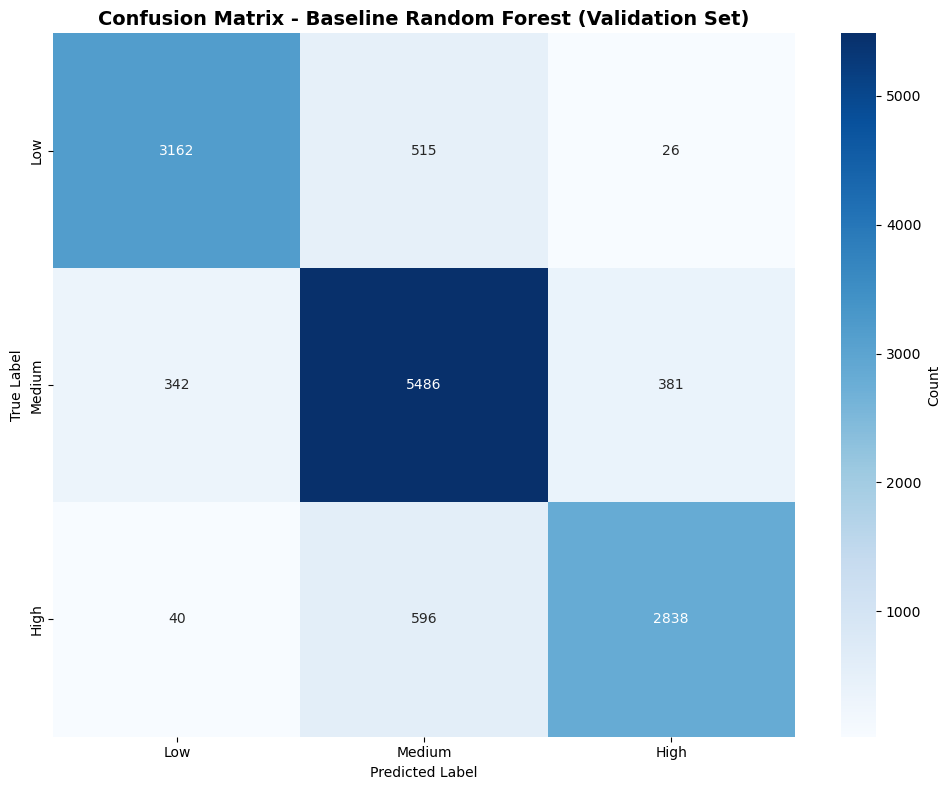


Confusion Matrix (Percentages):

Low (True):
  Predicted as Low: 85.4% (3162 samples)
  Predicted as Medium: 13.9% (515 samples)
  Predicted as High: 0.7% (26 samples)

Medium (True):
  Predicted as Low: 5.5% (342 samples)
  Predicted as Medium: 88.4% (5486 samples)
  Predicted as High: 6.1% (381 samples)

High (True):
  Predicted as Low: 1.2% (40 samples)
  Predicted as Medium: 17.2% (596 samples)
  Predicted as High: 81.7% (2838 samples)


In [134]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred, labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Baseline Random Forest (Validation Set)', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Show percentage breakdown
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
print("\nConfusion Matrix (Percentages):")
print("="*60)
for i, true_label in enumerate(['Low', 'Medium', 'High']):
    print(f"\n{true_label} (True):")
    for j, pred_label in enumerate(['Low', 'Medium', 'High']):
        print(f"  Predicted as {pred_label}: {cm_percent[i,j]:.1f}% ({cm[i,j]} samples)")

### Step 8: Save the Best Model

Save the trained model, scaler, and feature names for future use.

In [ ]:
import joblib
import pickle
from datetime import datetime

print("Saving trained model and preprocessing objects...")
print("="*60)

# Create a model package with all necessary components
model_package = {
    'model': rf_tuned,
    'scaler': scaler,
    'feature_names': X_train.columns.tolist(),
    'numeric_features': numeric_cols,
    'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'model_params': rf_tuned.get_params(),
    'performance': {
        'val_accuracy': val_accuracy_tuned,
        'val_f1_score': val_f1_tuned,
        'test_accuracy': test_accuracy,
        'test_f1_score': test_f1
    },
    'target_classes': ['Low', 'Medium', 'High']
}

# Save using joblib (efficient for scikit-learn models)
model_filename = 'steam_success_rf_model.pkl'
joblib.dump(model_package, model_filename)

print(f"✅ Model saved successfully to: {model_filename}")
print(f"\nModel package includes:")
print(f"  - Trained Random Forest model")
print(f"  - StandardScaler for feature scaling")
print(f"  - Feature names ({len(model_package['feature_names'])} features)")
print(f"  - Numeric feature list ({len(numeric_cols)} features)")
print(f"  - Model parameters and performance metrics")
print(f"  - Training date: {model_package['training_date']}")
print(f"\nModel performance saved:")
print(f"  - Validation F1: {val_f1_tuned:.4f}")
print(f"  - Test F1: {test_f1:.4f}")

In [ ]:
# Load the saved model
print("Loading saved model...")
print("="*60)

loaded_package = joblib.load(model_filename)

# Extract components
loaded_model = loaded_package['model']
loaded_scaler = loaded_package['scaler']
loaded_feature_names = loaded_package['feature_names']
loaded_numeric_features = loaded_package['numeric_features']

print(f"✅ Model loaded successfully!")
print(f"\nModel information:")
print(f"  - Training date: {loaded_package['training_date']}")
print(f"  - Number of features: {len(loaded_feature_names)}")
print(f"  - Model type: {type(loaded_model).__name__}")
print(f"  - Number of trees: {loaded_model.n_estimators}")
print(f"\nSaved performance metrics:")
for metric, value in loaded_package['performance'].items():
    print(f"  - {metric}: {value:.4f}")

print(f"\nTarget classes: {loaded_package['target_classes']}")

### Step 9: Load and Test the Saved Model

Demonstrate how to load the model and make predictions on new data.

In [ ]:
# Test the loaded model on a sample from test set
print("\n" + "="*60)
print("TESTING LOADED MODEL")
print("="*60)

# Take a sample of 5 games from test set
sample_indices = X_test.sample(5, random_state=42).index
X_sample = X_test.loc[sample_indices].copy()
y_sample_true = y_test.loc[sample_indices]

# Scale the sample using loaded scaler
X_sample_scaled = X_sample.copy()
X_sample_scaled[loaded_numeric_features] = loaded_scaler.transform(X_sample[loaded_numeric_features])

# Make predictions
y_sample_pred = loaded_model.predict(X_sample_scaled)
y_sample_proba = loaded_model.predict_proba(X_sample_scaled)

# Display results
print("\nSample Predictions:")
print("="*60)
for i, (idx, true_label, pred_label, proba) in enumerate(zip(sample_indices, y_sample_true, y_sample_pred, y_sample_proba), 1):
    print(f"\nGame {i} (Index: {idx}):")
    print(f"  True Label: {true_label}")
    print(f"  Predicted: {pred_label}")
    print(f"  Probabilities:")
    for class_name, prob in zip(loaded_package['target_classes'], proba):
        print(f"    - {class_name}: {prob:.2%}")
    print(f"  Correct: {'✅' if true_label == pred_label else '❌'}")

# Verify loaded model performs identically to original
y_test_pred_loaded = loaded_model.predict(X_test_scaled)
test_accuracy_loaded = accuracy_score(y_test, y_test_pred_loaded)
test_f1_loaded = f1_score(y_test, y_test_pred_loaded, average='weighted')

print("\n" + "="*60)
print("VERIFICATION: Loaded Model vs Original Model")
print("="*60)
print(f"Original Test Accuracy: {test_accuracy:.4f}")
print(f"Loaded Test Accuracy:   {test_accuracy_loaded:.4f}")
print(f"Match: {'✅' if abs(test_accuracy - test_accuracy_loaded) < 1e-6 else '❌'}")
print(f"\nOriginal Test F1: {test_f1:.4f}")
print(f"Loaded Test F1:   {test_f1_loaded:.4f}")
print(f"Match: {'✅' if abs(test_f1 - test_f1_loaded) < 1e-6 else '❌'}")

print("\n" + "="*60)
print("MODEL SAVE/LOAD COMPLETE! ✅")
print("="*60)